In [1101]:
import pandas as pd, numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [1102]:
data = pd.read_csv("Leads.csv")

In [1103]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [1104]:
data1 = data.copy()

# analysing data

In [1105]:
data1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1106]:
data1.shape

(9240, 37)

In [1107]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1108]:
data1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# checking for null values

In [1109]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Data Cleaning

# columns  of score, visits cannot be in decimal/ float datatype

# Converting float columns of Asymmetrique Activity Score , Asymmetrique Profile Score, TotalVisits to int

In [1110]:
data1["TotalVisits"].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [1111]:
data1[ "Asymmetrique Activity Score"].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [1112]:
data1["Asymmetrique Profile Score"].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [1113]:
data1["Page Views Per Visit"].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

# converting null/nan values to 0 then converting datatype from float to int

In [1114]:
data1["TotalVisits"].isnull().sum()

137

In [1115]:
data1["TotalVisits"].fillna(0, inplace = True)

In [1116]:
data1["TotalVisits"] = data1["TotalVisits"].astype(int)

In [1117]:
data1[ "Asymmetrique Activity Score"].isnull().sum()

4218

In [1118]:
data1[ "Asymmetrique Activity Score"].fillna(0,inplace = True)

In [1119]:
data1[ "Asymmetrique Activity Score"] = data1[ "Asymmetrique Activity Score"].astype(int)

In [1120]:
data1["Asymmetrique Profile Score"].isnull().sum()

4218

In [1121]:
data1["Asymmetrique Profile Score"].fillna(0,inplace = True)

In [1122]:
data1["Asymmetrique Profile Score"] = data1["Asymmetrique Profile Score"].astype(int)

In [1123]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   int32  
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Cleaning null values 

In [1124]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#  Looking into Tags column

In [1125]:
data1['Tags'].isnull().sum()

3353

In [1126]:
data1['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [1127]:
data1['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1128]:
data1['Tags'].mode()

0    Will revert after reading the email
dtype: object

# imputing null values with mode

In [1129]:
data1['Tags'].fillna('Will revert after reading the email',inplace = True)

# Looking into lead quality column

In [1130]:
data1["Lead Quality"].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [1131]:
data1["Lead Quality"].isnull().sum()

4767

In [1132]:
data1["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

# imputing lead Quality column with modal values

In [1133]:
data1["Lead Quality"].mode()

0    Might be
dtype: object

In [1134]:
data1["Lead Quality"].fillna("Might be", inplace = True)

In [1135]:
data1["Lead Quality"].isnull().sum()

0

# Checking null values columns

In [1136]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1137]:
round(data1.isnull().sum()/len(data1.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       0.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

# looking into Asymmetrique Activity Index and Asymmetrique Profile Index columns

In [1138]:
data1["Asymmetrique Activity Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [1139]:
data1["Asymmetrique Activity Index"].isnull().sum()

4218

In [1140]:
data1["Asymmetrique Profile Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [1141]:
data1["Asymmetrique Profile Index"].isnull().sum()

4218

# from 9240 rows, 4218 are null values for both "Asymmetrique Profile Index" and "Asymmetrique Activity Index" columns

data1[data1["Asymmetrique Activity Index"].isnull()]

# since the missing data is too large, we drop the columns "Tags", "Asymmetrique Profile Index" and "Asymmetrique Activity Index", Asymmetrique Activity Score , Asymmetrique Profile Score

data1.drop(['Tags', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score' , 'Asymmetrique Profile Score'],axis= 1, inplace = True)

In [1142]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Looking into 'Asymmetrique Activity Index' column

In [1143]:
data1['Asymmetrique Activity Index']

0       02.Medium
1       02.Medium
2       02.Medium
3       02.Medium
4       02.Medium
          ...    
9235    02.Medium
9236    02.Medium
9237    02.Medium
9238    02.Medium
9239    02.Medium
Name: Asymmetrique Activity Index, Length: 9240, dtype: object

In [1144]:
data1['Asymmetrique Activity Index'].isnull().sum()

4218

In [1145]:
data1['Asymmetrique Activity Index'].mode()

0    02.Medium
dtype: object

# imputing null values with mode

In [1146]:
data1['Asymmetrique Activity Index'].fillna('02.Medium',inplace = True)

In [1147]:
data1['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low'], dtype=object)

# Looking into 'Asymmetrique Profile Index' column

In [1148]:
data1['Asymmetrique Profile Index']

0       02.Medium
1       02.Medium
2         01.High
3         01.High
4         01.High
          ...    
9235      01.High
9236      01.High
9237      01.High
9238    02.Medium
9239      01.High
Name: Asymmetrique Profile Index, Length: 9240, dtype: object

In [1149]:
data1['Asymmetrique Profile Index'].isnull().sum()

4218

In [1150]:
data1['Asymmetrique Profile Index'].mode()

0    02.Medium
dtype: object

In [1151]:
data1['Asymmetrique Profile Index'].fillna('02.Medium',inplace = True)

In [1152]:
data1['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low'], dtype=object)

# Checking on null values of data1

In [1153]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Looking into Lead Profile column

# Column description : A lead level assigned to each customer based on their profile.

In [1154]:
data1['Lead Profile']

0               Select
1               Select
2       Potential Lead
3               Select
4               Select
             ...      
9235    Potential Lead
9236    Potential Lead
9237    Potential Lead
9238               NaN
9239    Potential Lead
Name: Lead Profile, Length: 9240, dtype: object

In [1155]:
data1['Lead Profile'].isnull().sum()

2709

In [1156]:
data1['Lead Profile'].mode()

0    Select
dtype: object

In [1157]:
data1['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

# Converting select input as undecided, and nan values as undecided as well

In [1158]:
data1['Lead Profile'].fillna('Select',inplace = True)

In [1159]:
data1['Lead Profile'].value_counts()

Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1160]:
data1['Lead Profile'].isnull().sum()

0

In [1161]:
data1['Lead Profile'] = np.where(data1['Lead Profile'] == 'Select','Undecided',data1['Lead Profile'])

In [1162]:
data1['Lead Profile'].value_counts()

Undecided                      6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

# Checking on null values in data1

In [1163]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Looking into 'What matters most to you in choosing a course' column

In [1164]:
data1['What matters most to you in choosing a course']

0       Better Career Prospects
1       Better Career Prospects
2       Better Career Prospects
3       Better Career Prospects
4       Better Career Prospects
                 ...           
9235    Better Career Prospects
9236    Better Career Prospects
9237    Better Career Prospects
9238                        NaN
9239    Better Career Prospects
Name: What matters most to you in choosing a course, Length: 9240, dtype: object

In [1165]:
data1['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [1166]:
data1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

# replacing null values with mode

In [1167]:
data1['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [1168]:
data1['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace = True)

# Checking on null values in data1

In [1169]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

# Looking into 'What is your current occupation' column

In [1170]:
data1['What is your current occupation']

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238           NaN
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

In [1171]:
data1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1172]:
data1['What is your current occupation'].isnull().sum()

2690

# filling null values with mode

In [1173]:
data1['What is your current occupation'].fillna('Unemployed' , inplace = True)

# Checking on null values in data1

In [1174]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

# Looking into 'How did you hear about X Education' column

# Column description : The source from which the customer heard about X Education.

In [1175]:
data1['How did you hear about X Education']

0              Select
1              Select
2              Select
3       Word Of Mouth
4               Other
            ...      
9235           Select
9236           Select
9237           Select
9238    Online Search
9239           Select
Name: How did you hear about X Education, Length: 9240, dtype: object

In [1176]:
data1['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

# Putting select and nan values in 'other' category

# replacing null with mode, that is select

In [1177]:
data1['How did you hear about X Education'].fillna('Select', inplace = True)

In [1178]:
data1['How did you hear about X Education'] = np.where(data1['How did you hear about X Education'] == 'Select', 'Other', data1['How did you hear about X Education'])

In [1179]:
data1['How did you hear about X Education'].value_counts()

Other                    7436
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

# Checking on null values in data1

In [1180]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

# Checking in Specilization column

In [1181]:
data1['Specialization']

0                          Select
1                          Select
2         Business Administration
3           Media and Advertising
4                          Select
                  ...            
9235       IT Projects Management
9236        Media and Advertising
9237      Business Administration
9238    Human Resource Management
9239      Supply Chain Management
Name: Specialization, Length: 9240, dtype: object

In [1182]:
data1['Specialization'].isnull().sum()

1438

In [1183]:
data1['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

# dropping nan and select values

In [1184]:
data1['Specialization'].isnull().sum()

1438

In [1185]:
data1['Specialization'] = np.where(data1['Specialization'] == 'Select' , 'Finance Management',data1['Specialization'])

In [1186]:
data1['Specialization'].fillna('Finance Management',inplace = True)

In [1187]:
data1['Specialization'].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

# Checking on null values in data1

In [1188]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

# Checking Country and city column

In [1189]:
data1['Country']

0                NaN
1              India
2              India
3              India
4              India
            ...     
9235    Saudi Arabia
9236           India
9237           India
9238           India
9239      Bangladesh
Name: Country, Length: 9240, dtype: object

In [1190]:
data1['City']

0                   Select
1                   Select
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

# Replacing Select in City column with mode

In [1191]:
data1['City'] = np.where(data1['City'] == 'Select' , 'Mumbai',data1['City'])

In [1192]:
data1['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1193]:
data1['City'].value_counts()

Mumbai                         5471
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

# Replacing NAN with mode

In [1194]:
data1['Country'].fillna('India', inplace = True)

In [1195]:
data1['City'].fillna('Mumbai', inplace = True)

In [1196]:
data1.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                        0
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

In [1197]:
data1['Lead Source']

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [1198]:
data1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1199]:
data1['Lead Source'].fillna('Google' , inplace = True)

In [1200]:
data1['Page Views Per Visit']

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64

In [1201]:
data1['Page Views Per Visit'].mean()

2.3628199494672093

In [1202]:
data1['Page Views Per Visit'].median()

2.0

# replacing nan with median

In [1203]:
data1['Page Views Per Visit'].fillna('2.0', inplace = True)

In [1204]:
data1.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                        0
Total Time Spent on Website                        0
Page Views Per Visit                               0
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

In [1205]:
data1['Last Activity']

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235          Email Marked Spam
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9240, dtype: object

In [1206]:
data1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1207]:
data1['Last Activity'].fillna('Email Opened' , inplace = True)

In [1208]:
data1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [1209]:
data1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [1210]:
data1.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score
Lead Number,1.000000,0.025157,0.017093,0.020329,0.157969,0.147041
Converted,0.025157,1.000000,0.022502,0.362483,0.005415,0.013926
TotalVisits,0.017093,0.022502,1.000000,0.209468,0.017340,0.034921
Total Time Spent on Website,0.020329,0.362483,0.209468,1.000000,0.008618,0.036430
Asymmetrique Activity Score,0.157969,0.005415,0.017340,0.008618,1.000000,0.973984
Asymmetrique Profile Score,0.147041,0.013926,0.034921,0.036430,0.973984,1.000000


# using label encoding on  Asymmetrique Activity Index and Asymmetrique Profile Index

In [1211]:
label_encoder = preprocessing.LabelEncoder()

In [1212]:
data1['Asymmetrique Activity Index']= label_encoder.fit_transform(data1['Asymmetrique Activity Index'])

In [1213]:
data1['Asymmetrique Profile Index']= label_encoder.fit_transform(data1['Asymmetrique Profile Index'])

In [1214]:
data1['A free copy of Mastering The Interview']= label_encoder.fit_transform(data1['A free copy of Mastering The Interview'])

In [1215]:
data1['Do Not Email']= label_encoder.fit_transform(data1['Do Not Email'])

In [1216]:
data1['Do Not Call']= label_encoder.fit_transform(data1['Do Not Call'])

In [1217]:
data1['Search'] = label_encoder.fit_transform(data1['Search'])

In [1218]:
data1['Newspaper Article'] = label_encoder.fit_transform(data1['Newspaper Article'])

In [1219]:
data1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,0,0.0,...,No,Undecided,Mumbai,1,1,15,15,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5,674,2.5,...,No,Undecided,Mumbai,1,1,15,15,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,...,No,Potential Lead,Mumbai,1,0,14,20,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,...,No,Undecided,Mumbai,1,0,13,17,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2,1428,1.0,...,No,Undecided,Mumbai,1,0,15,18,No,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,0,1,8,1845,2.67,...,No,Potential Lead,Mumbai,1,0,15,17,No,0,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,0,2,238,2.0,...,No,Potential Lead,Mumbai,1,0,14,19,No,1,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,0,2,199,2.0,...,No,Potential Lead,Mumbai,1,0,13,20,No,1,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,0,1,3,499,3.0,...,No,Undecided,Other Metro Cities,1,1,15,16,No,0,SMS Sent


In [1220]:
data1.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
Lead Number,1.000000,-0.098529,0.011913,0.025157,0.017093,0.020329,-0.012777,-0.012294,0.050362,-0.026123,0.157969,0.147041,-0.109696
Do Not Email,-0.098529,1.000000,-0.004322,-0.135580,0.033736,-0.046374,-0.011443,-0.004322,0.043440,0.010692,-0.037206,-0.034224,0.055762
Do Not Call,0.011913,-0.004322,1.000000,0.018581,0.003364,0.006801,-0.000573,-0.000216,-0.018699,-0.009026,0.015788,0.013584,-0.009921
Converted,0.025157,-0.135580,0.018581,1.000000,0.022502,0.362483,-0.002261,0.003465,-0.022031,-0.099340,0.005415,0.013926,-0.039820
TotalVisits,0.017093,0.033736,0.003364,0.022502,1.000000,0.209468,0.049754,0.033787,0.020897,-0.097663,0.017340,0.034921,0.207953
Total Time Spent on Website,0.020329,-0.046374,0.006801,0.362483,0.209468,1.000000,0.012654,0.011326,0.057178,-0.125299,0.008618,0.036430,0.168298
Search,-0.012777,-0.011443,-0.000573,-0.002261,0.049754,0.012654,1.000000,0.188573,0.005461,-0.011011,-0.003810,-0.002485,-0.002256
Newspaper Article,-0.012294,-0.004322,-0.000216,0.003465,0.033787,0.011326,0.188573,1.000000,0.002063,-0.009026,-0.000563,-0.000684,0.005950
Asymmetrique Activity Index,0.050362,0.043440,-0.018699,-0.022031,0.020897,0.057178,0.005461,0.002063,1.000000,-0.067816,-0.247725,-0.105560,0.063559
Asymmetrique Profile Index,-0.026123,0.010692,-0.009026,-0.099340,-0.097663,-0.125299,-0.011011,-0.009026,-0.067816,1.000000,-0.474854,-0.615920,-0.153605


In [1221]:
(len(data1.index)/9240)*100

100.0

In [1222]:
data1.shape

(9240, 37)

In [1223]:
data1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,0,0.0,...,No,Undecided,Mumbai,1,1,15,15,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5,674,2.5,...,No,Undecided,Mumbai,1,1,15,15,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2.0,...,No,Potential Lead,Mumbai,1,0,14,20,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1.0,...,No,Undecided,Mumbai,1,0,13,17,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2,1428,1.0,...,No,Undecided,Mumbai,1,0,15,18,No,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,0,1,8,1845,2.67,...,No,Potential Lead,Mumbai,1,0,15,17,No,0,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,0,2,238,2.0,...,No,Potential Lead,Mumbai,1,0,14,19,No,1,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,0,2,199,2.0,...,No,Potential Lead,Mumbai,1,0,13,20,No,1,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,0,1,3,499,3.0,...,No,Undecided,Other Metro Cities,1,1,15,16,No,0,SMS Sent


# removing prospect ID and Lead Number columns

In [1224]:
data1['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [1225]:
data1['Search'].value_counts()

0    9226
1      14
Name: Search, dtype: int64

In [1226]:
data1['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [1227]:
data1['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [1228]:
data1['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [1229]:
data1['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [1230]:
data1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1231]:
data1['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [1232]:
data1['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [1233]:
data1['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [1234]:
data1['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [1235]:
data1['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1236]:
data1['Do Not Call'].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

In [1237]:
data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [1238]:
data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1239]:
data1['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1240]:
data1['Asymmetrique Activity Index'].value_counts()

1    8057
0     821
2     362
Name: Asymmetrique Activity Index, dtype: int64

In [1241]:
data1['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1242]:
data1.drop(['Tags','Asymmetrique Profile Score','Asymmetrique Activity Index','Country','Newspaper Article','Do Not Call','What matters most to you in choosing a course','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Search','Magazine','Get updates on DM Content','A free copy of Mastering The Interview','Update me on Supply Chain Content','I agree to pay the amount through cheque'], axis=1, inplace = True)

In [1243]:
data2 = data1[data1.columns[2:]]

In [1244]:
data2

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Asymmetrique Activity Score,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Finance Management,Other,Unemployed,Low in Relevance,Undecided,Mumbai,1,15,Modified
1,API,Organic Search,0,0,5,674,2.5,Email Opened,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,15,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Other,Student,Might be,Potential Lead,Mumbai,0,14,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Not Sure,Undecided,Mumbai,0,13,Modified
4,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,0,15,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8,1845,2.67,Email Marked Spam,IT Projects Management,Other,Unemployed,High in Relevance,Potential Lead,Mumbai,0,15,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2,238,2.0,SMS Sent,Media and Advertising,Other,Unemployed,Might be,Potential Lead,Mumbai,0,14,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2,199,2.0,SMS Sent,Business Administration,Other,Unemployed,Not Sure,Potential Lead,Mumbai,0,13,SMS Sent
9238,Landing Page Submission,Google,0,1,3,499,3.0,SMS Sent,Human Resource Management,Online Search,Unemployed,Might be,Undecided,Other Metro Cities,1,15,SMS Sent


In [1245]:
data2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Last Notable Activity'],
      dtype='object')

In [1246]:
data2[data2.duplicated()]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Asymmetrique Activity Score,Last Notable Activity
16,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,17,Modified
47,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,17,Modified
49,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,17,Modified
69,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,15,Modified
83,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,17,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,17,Modified
9148,API,Olark Chat,0,0,0,0,0.0,Olark Chat Conversation,Finance Management,Other,Unemployed,Not Sure,Potential Lead,Mumbai,1,12,Modified
9165,API,Olark Chat,0,1,0,0,0.0,SMS Sent,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,16,Modified
9170,API,Olark Chat,0,0,0,0,0.0,Email Opened,Finance Management,Other,Unemployed,Might be,Potential Lead,Mumbai,1,17,Email Opened


In [1247]:
data2.drop_duplicates()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Asymmetrique Activity Score,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Finance Management,Other,Unemployed,Low in Relevance,Undecided,Mumbai,1,15,Modified
1,API,Organic Search,0,0,5,674,2.5,Email Opened,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,15,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Other,Student,Might be,Potential Lead,Mumbai,0,14,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Not Sure,Undecided,Mumbai,0,13,Modified
4,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,0,15,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8,1845,2.67,Email Marked Spam,IT Projects Management,Other,Unemployed,High in Relevance,Potential Lead,Mumbai,0,15,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2,238,2.0,SMS Sent,Media and Advertising,Other,Unemployed,Might be,Potential Lead,Mumbai,0,14,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2,199,2.0,SMS Sent,Business Administration,Other,Unemployed,Not Sure,Potential Lead,Mumbai,0,13,SMS Sent
9238,Landing Page Submission,Google,0,1,3,499,3.0,SMS Sent,Human Resource Management,Online Search,Unemployed,Might be,Undecided,Other Metro Cities,1,15,SMS Sent


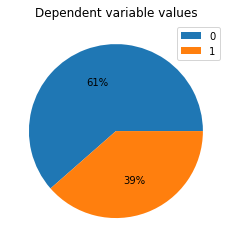

In [1248]:
plt.pie(data2['Converted'].value_counts(),autopct='%.0f%%')
plt.title('Dependent variable values')
plt.legend([0,1])
plt.show()

<AxesSubplot:>

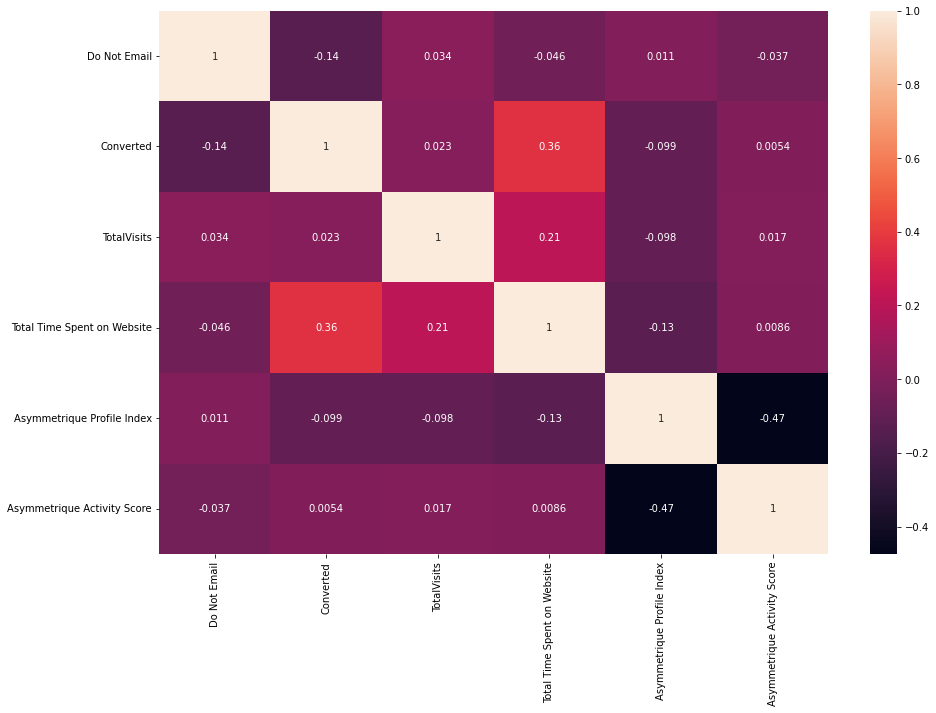

In [1249]:
plt.figure(figsize = (15,10))
sns.heatmap(data2.corr(), annot = True)

# Since Asymmetrique Activity Score and Asymmetrique Profile Score are highly corelated, we will keep only one of them. Deleting Asymmetrique Activity Score

In [1250]:
data2.drop('Asymmetrique Activity Score',axis = 1,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1251]:
data2['Converted'] = data2['Converted'].astype(np.int32)

C:\Users\raina\AppData\Local\Temp/ipykernel_3516/1578015640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Converted'] = data2['Converted'].astype(np.int32)


In [1252]:
data2['Total Time Spent on Website'] = data2['Total Time Spent on Website'].astype(np.int32)

C:\Users\raina\AppData\Local\Temp/ipykernel_3516/2436753574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Total Time Spent on Website'] = data2['Total Time Spent on Website'].astype(np.int32)


In [1253]:
data2['Page Views Per Visit'] = data2['Page Views Per Visit'].astype(float)

C:\Users\raina\AppData\Local\Temp/ipykernel_3516/3347773711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Page Views Per Visit'] = data2['Page Views Per Visit'].astype(float)


In [1254]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         9240 non-null   object 
 1   Lead Source                         9240 non-null   object 
 2   Do Not Email                        9240 non-null   int32  
 3   Converted                           9240 non-null   int32  
 4   TotalVisits                         9240 non-null   int32  
 5   Total Time Spent on Website         9240 non-null   int32  
 6   Page Views Per Visit                9240 non-null   float64
 7   Last Activity                       9240 non-null   object 
 8   Specialization                      9240 non-null   object 
 9   How did you hear about X Education  9240 non-null   object 
 10  What is your current occupation     9240 non-null   object 
 11  Lead Quality                        9240 no

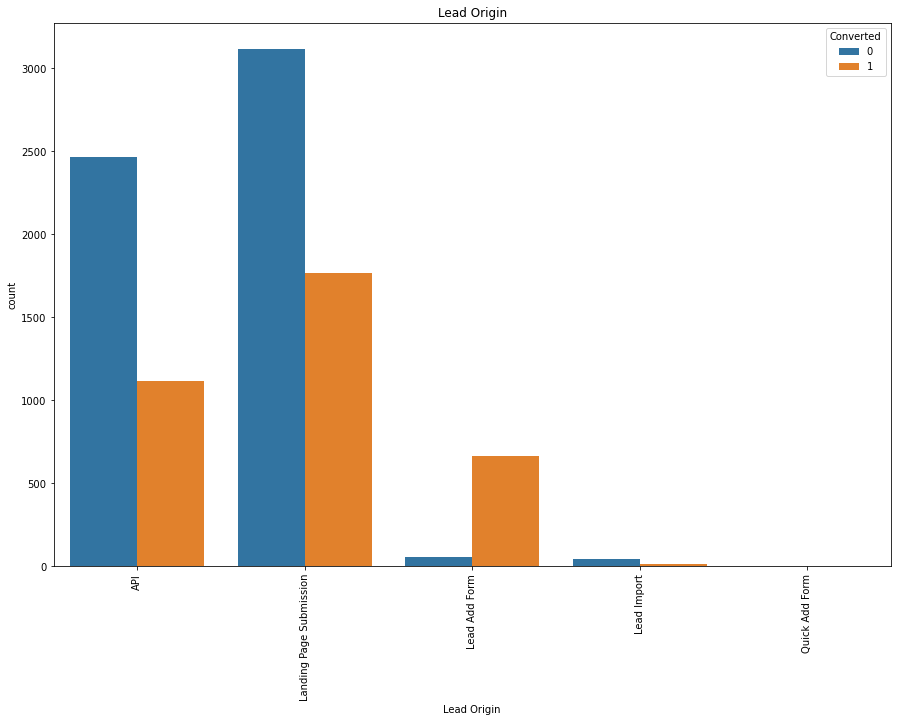

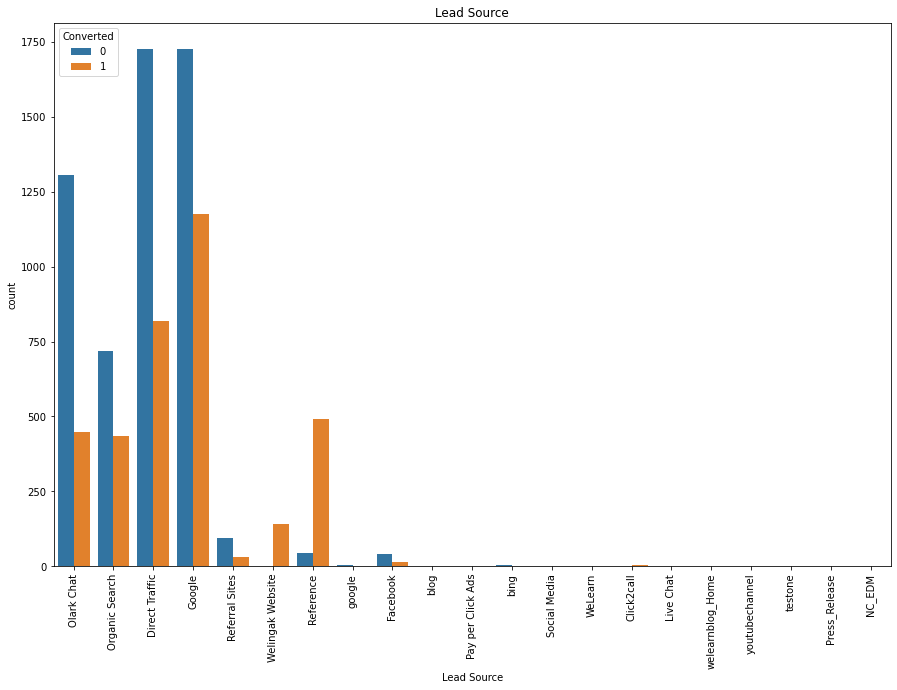

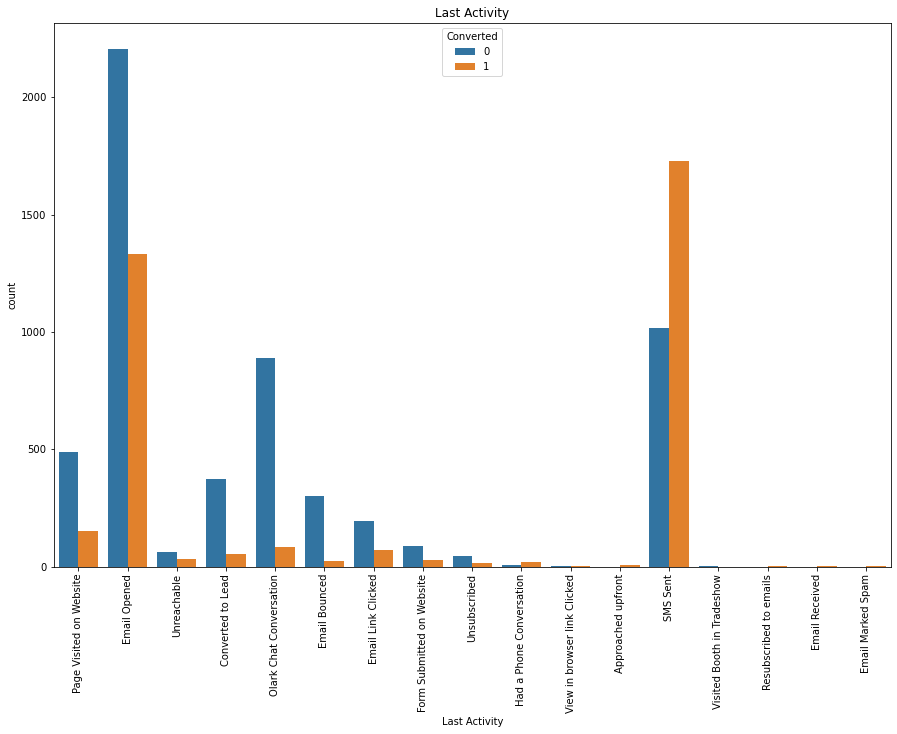

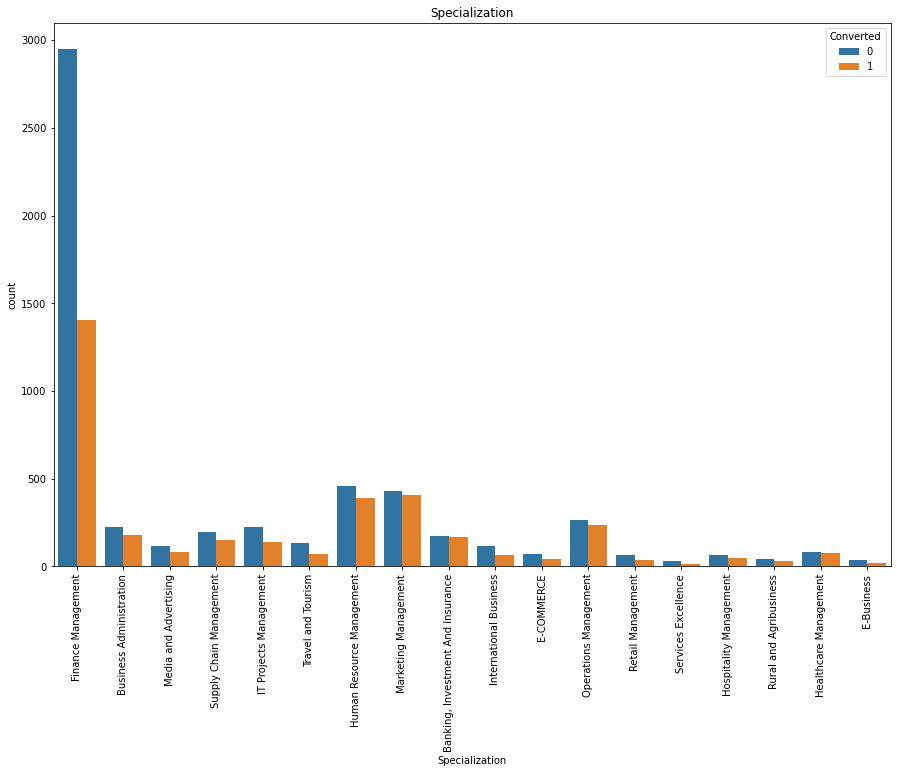

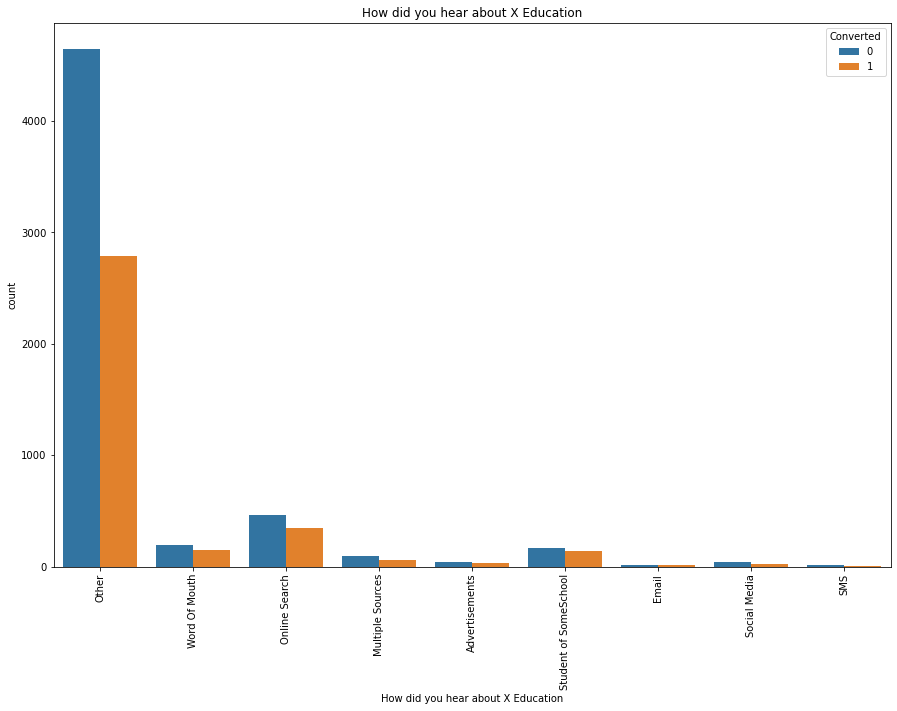

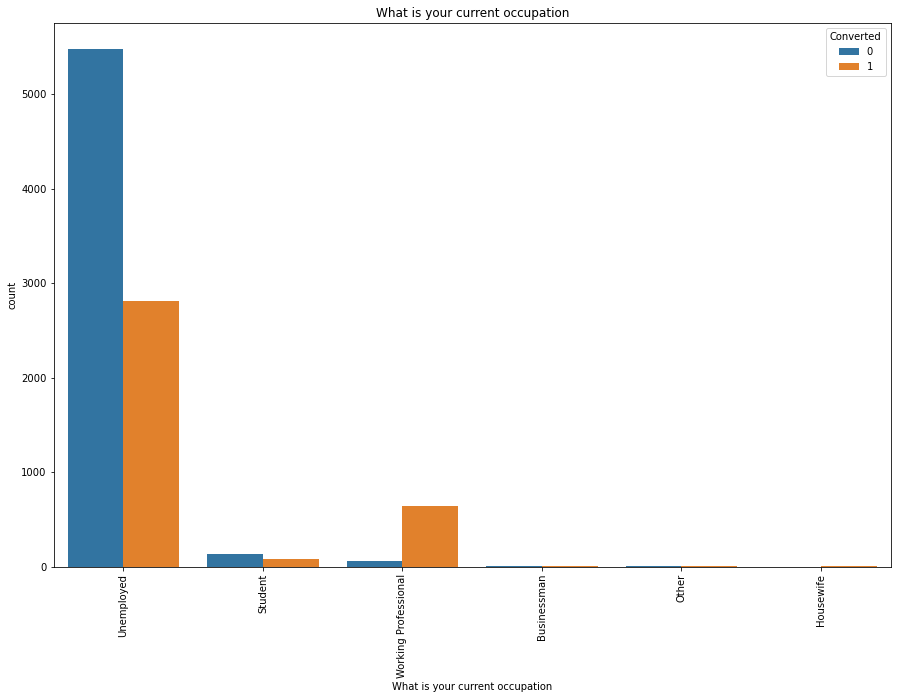

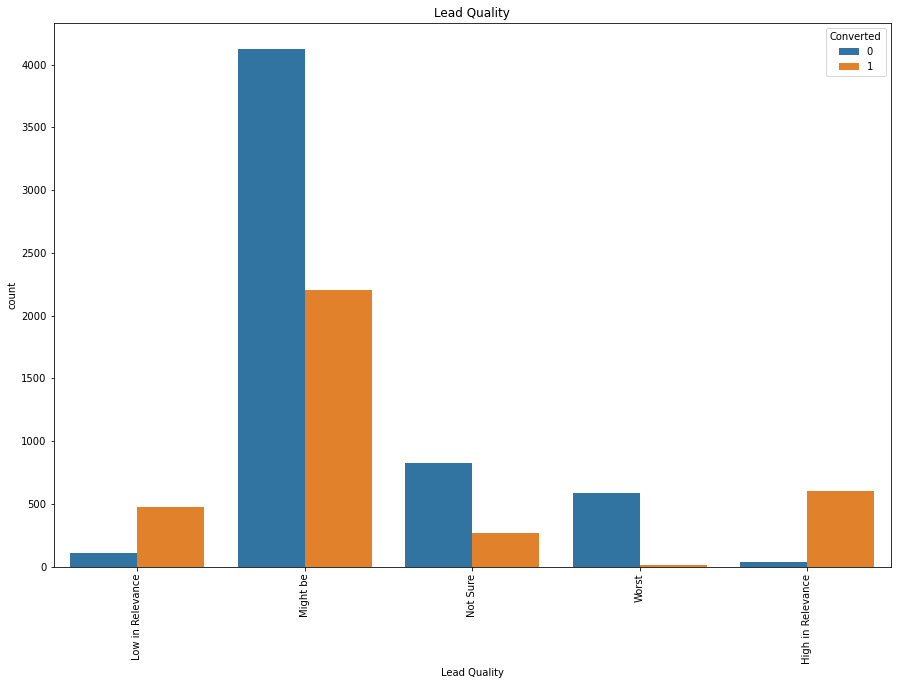

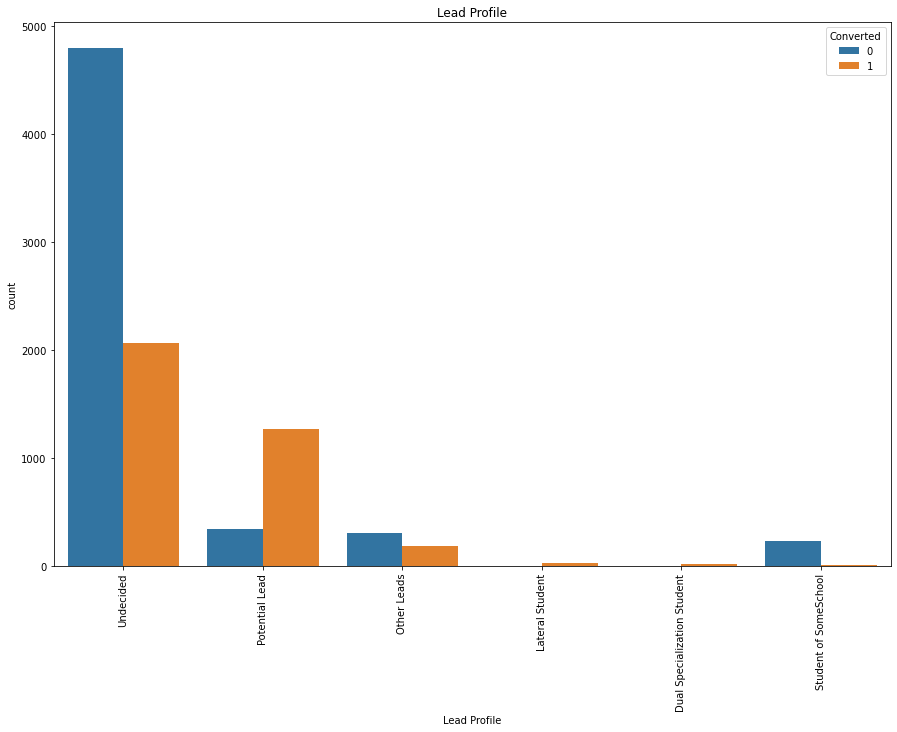

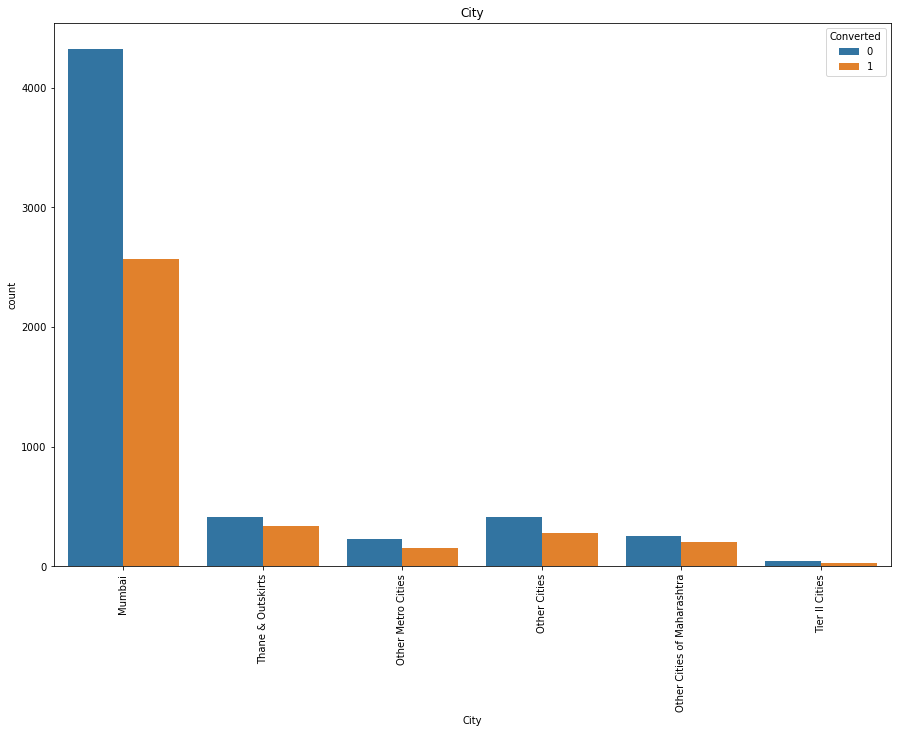

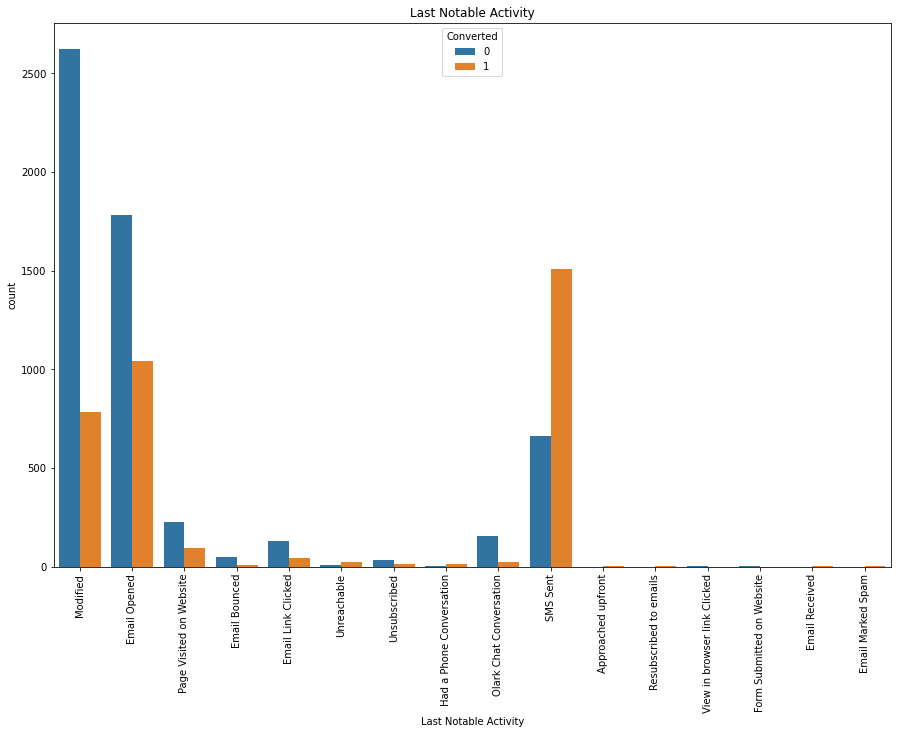

In [1255]:
for i in data2.columns:
    if data2[i].dtype != int and data2[i].dtype != float :
        plt.figure(figsize = (15,10)) 
        sns.countplot(x = i, data = data2, hue = 'Converted')
        plt.title( i )
        plt.xticks(rotation = 90)
        plt.show()

# Checking for outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


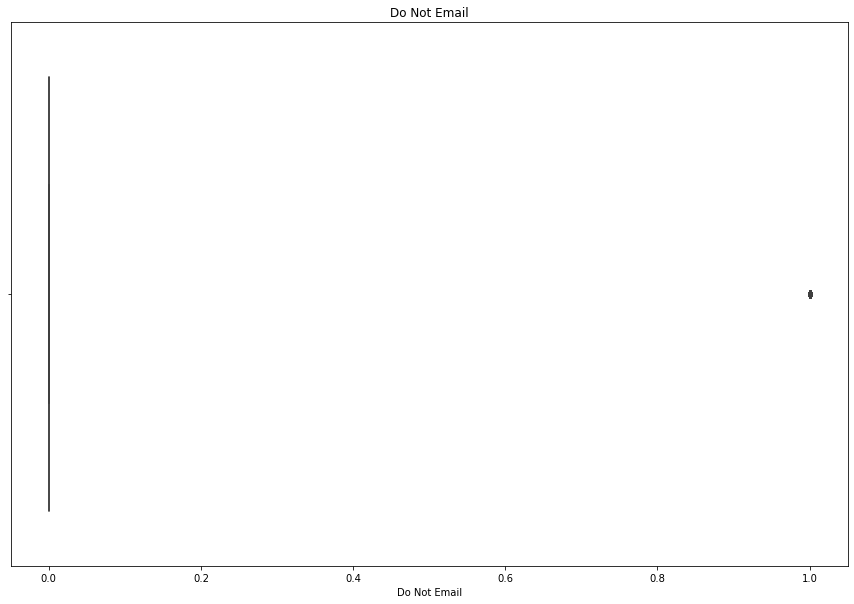

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


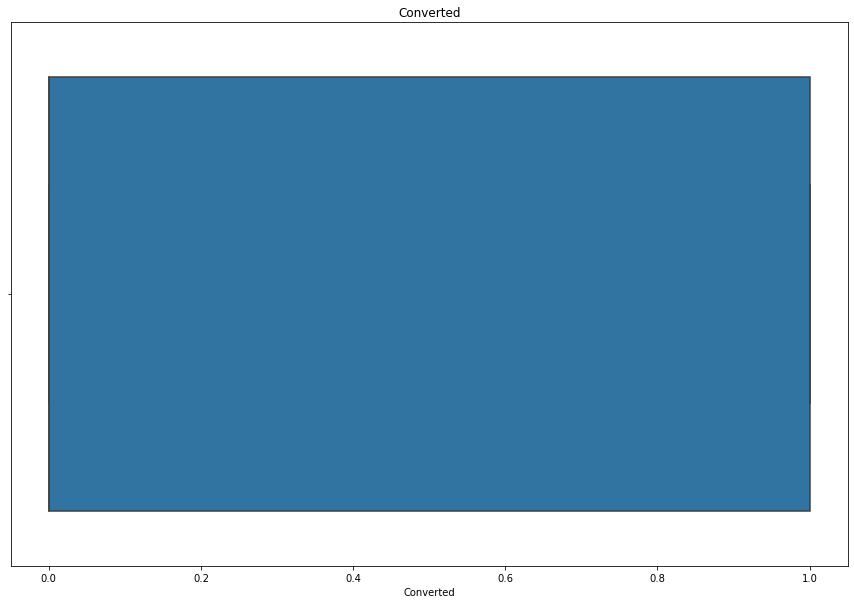

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


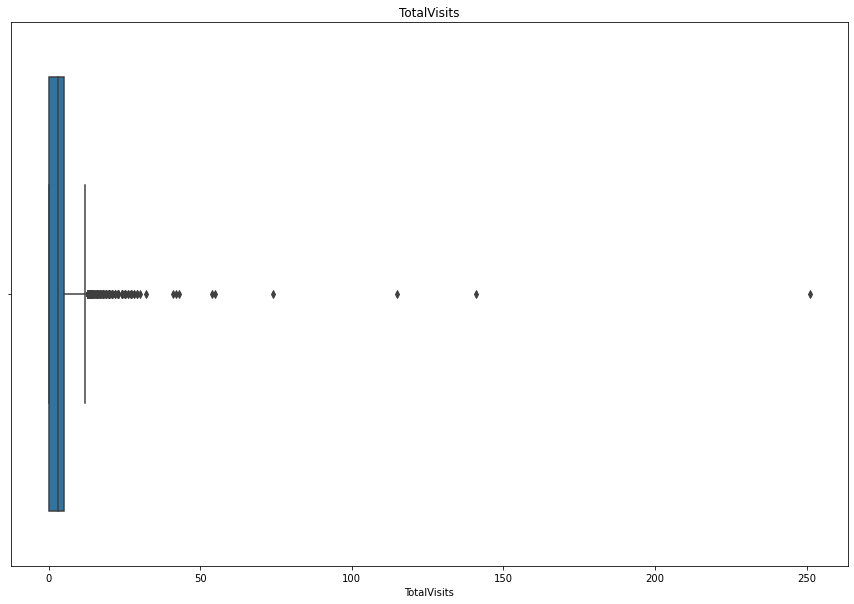

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


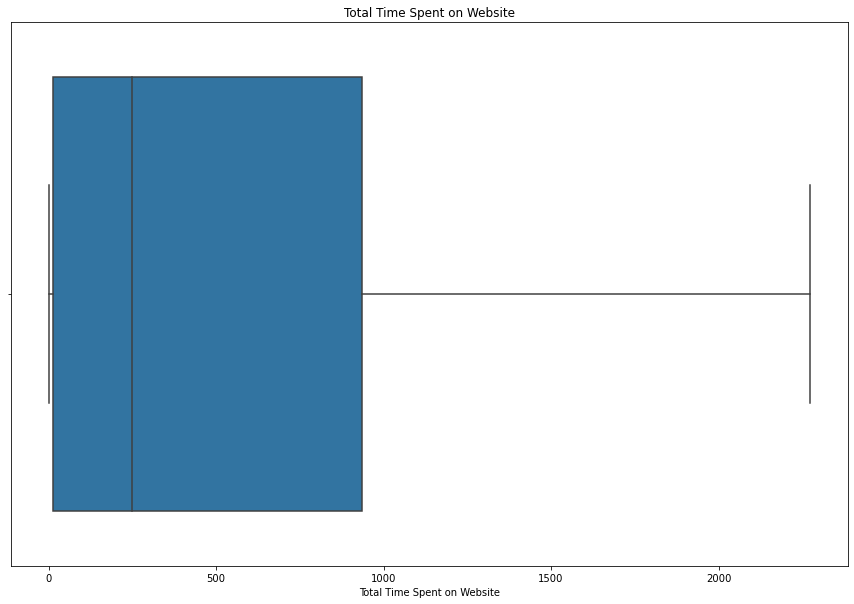

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


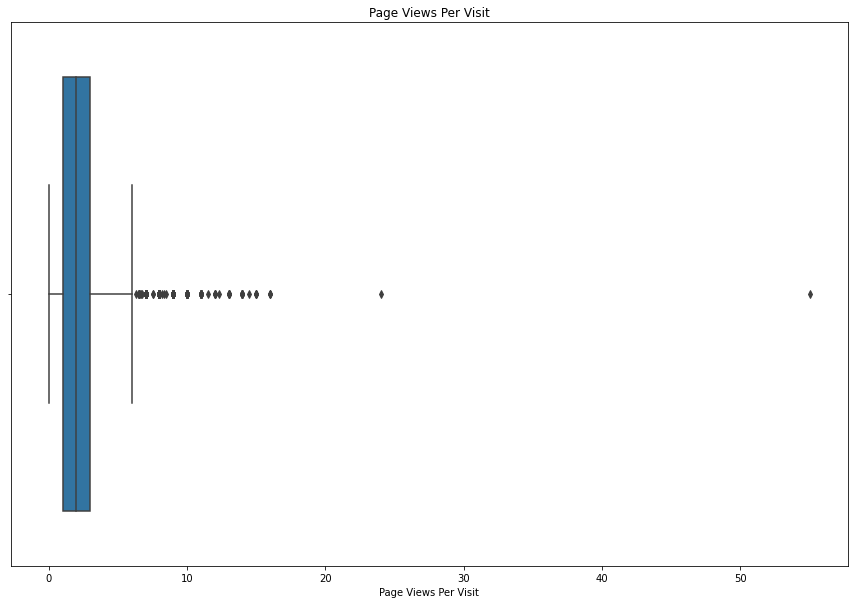

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


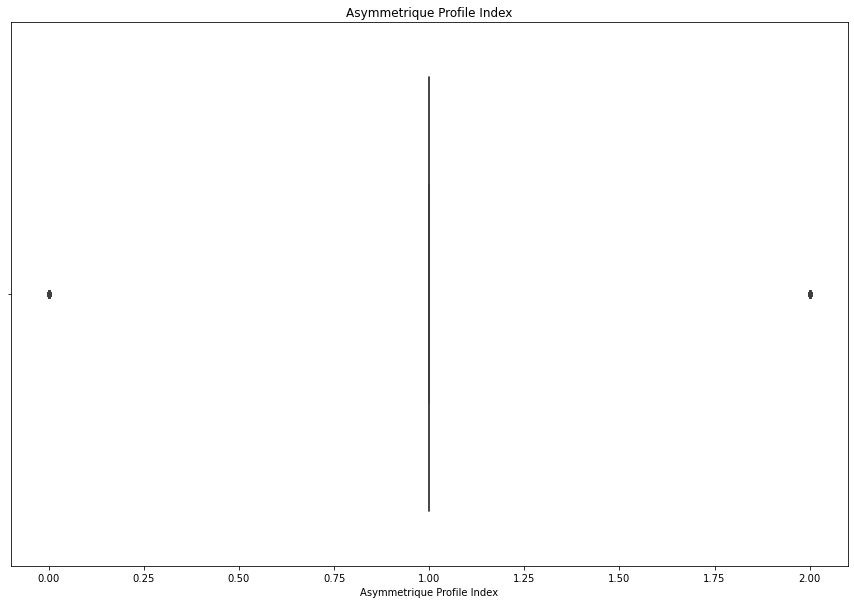

In [1256]:
for i in data2.columns:
    if data2[i].dtype == int or data2[i].dtype == float:
        plt.figure(figsize = (15,10)) 
        sns.boxplot(data2[i])
        plt.title( i )
        plt.show()

In [1257]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         9240 non-null   object 
 1   Lead Source                         9240 non-null   object 
 2   Do Not Email                        9240 non-null   int32  
 3   Converted                           9240 non-null   int32  
 4   TotalVisits                         9240 non-null   int32  
 5   Total Time Spent on Website         9240 non-null   int32  
 6   Page Views Per Visit                9240 non-null   float64
 7   Last Activity                       9240 non-null   object 
 8   Specialization                      9240 non-null   object 
 9   How did you hear about X Education  9240 non-null   object 
 10  What is your current occupation     9240 non-null   object 
 11  Lead Quality                        9240 no

In [1258]:
list1 = ['TotalVisits','Page Views Per Visit']

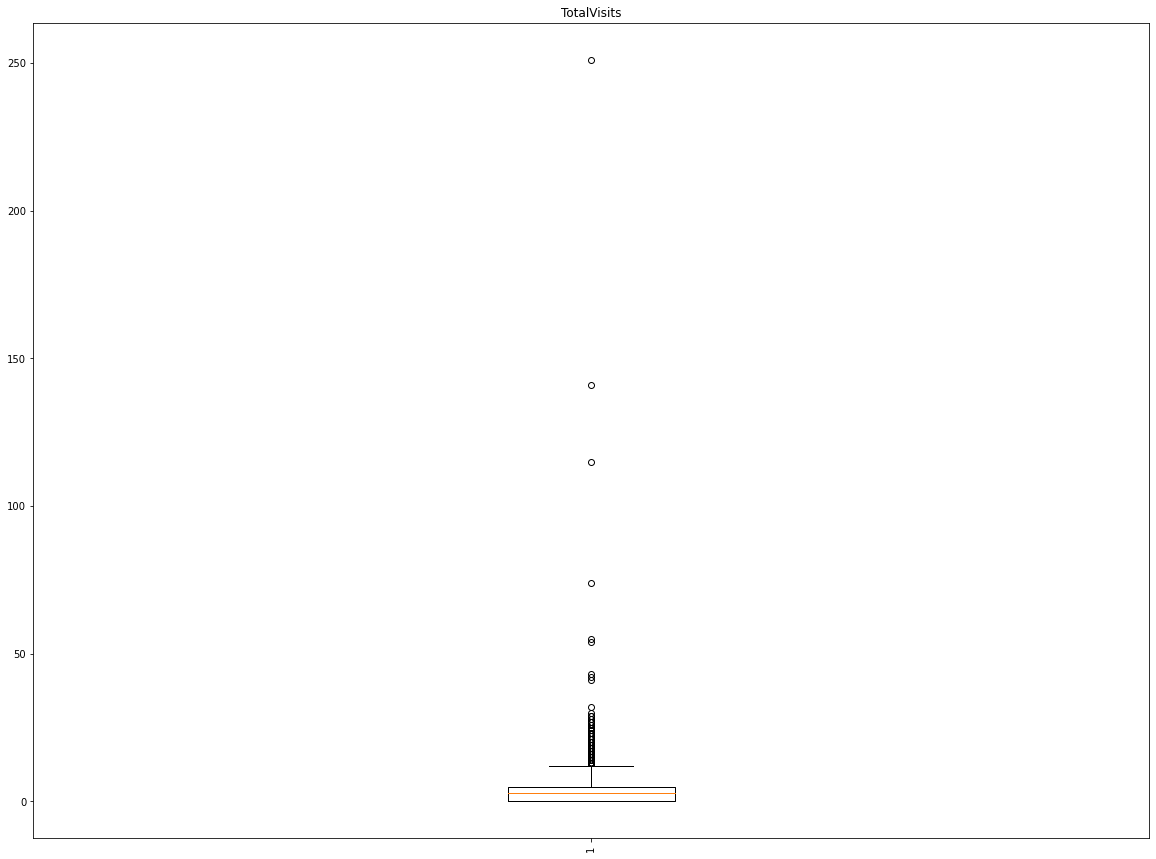

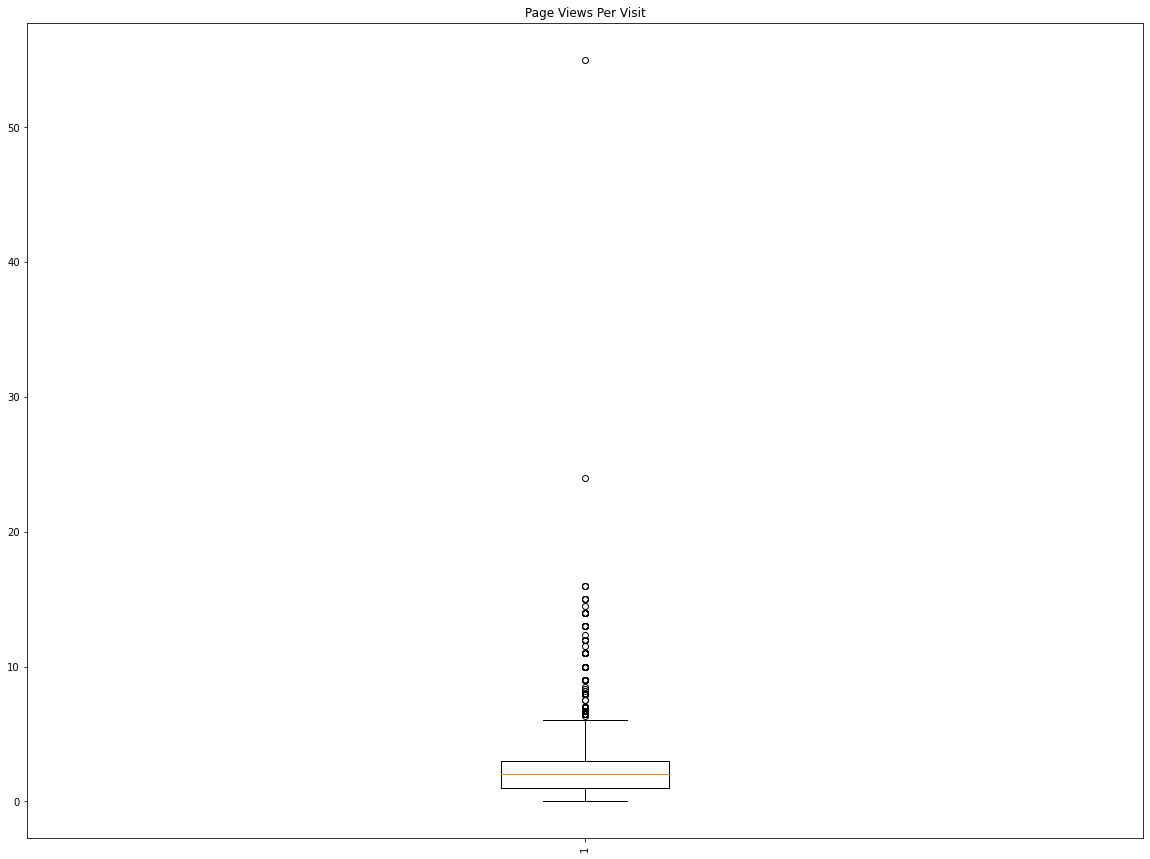

In [1259]:
for i in list1:
    plt.figure(figsize=(20,15))
    plt.boxplot(data = data2, x = i)
    plt.title(i)
    plt.xticks(rotation = 90)
    plt.show()

In [1260]:
data3 = data2[data2['Page Views Per Visit']<6]
data3

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0.00,Page Visited on Website,Finance Management,Other,Unemployed,Low in Relevance,Undecided,Mumbai,1,Modified
1,API,Organic Search,0,0,5,674,2.50,Email Opened,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Email Opened,Business Administration,Other,Student,Might be,Potential Lead,Mumbai,0,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Not Sure,Undecided,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1.00,Converted to Lead,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8,1845,2.67,Email Marked Spam,IT Projects Management,Other,Unemployed,High in Relevance,Potential Lead,Mumbai,0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2,238,2.00,SMS Sent,Media and Advertising,Other,Unemployed,Might be,Potential Lead,Mumbai,0,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2,199,2.00,SMS Sent,Business Administration,Other,Unemployed,Not Sure,Potential Lead,Mumbai,0,SMS Sent
9238,Landing Page Submission,Google,0,1,3,499,3.00,SMS Sent,Human Resource Management,Online Search,Unemployed,Might be,Undecided,Other Metro Cities,1,SMS Sent


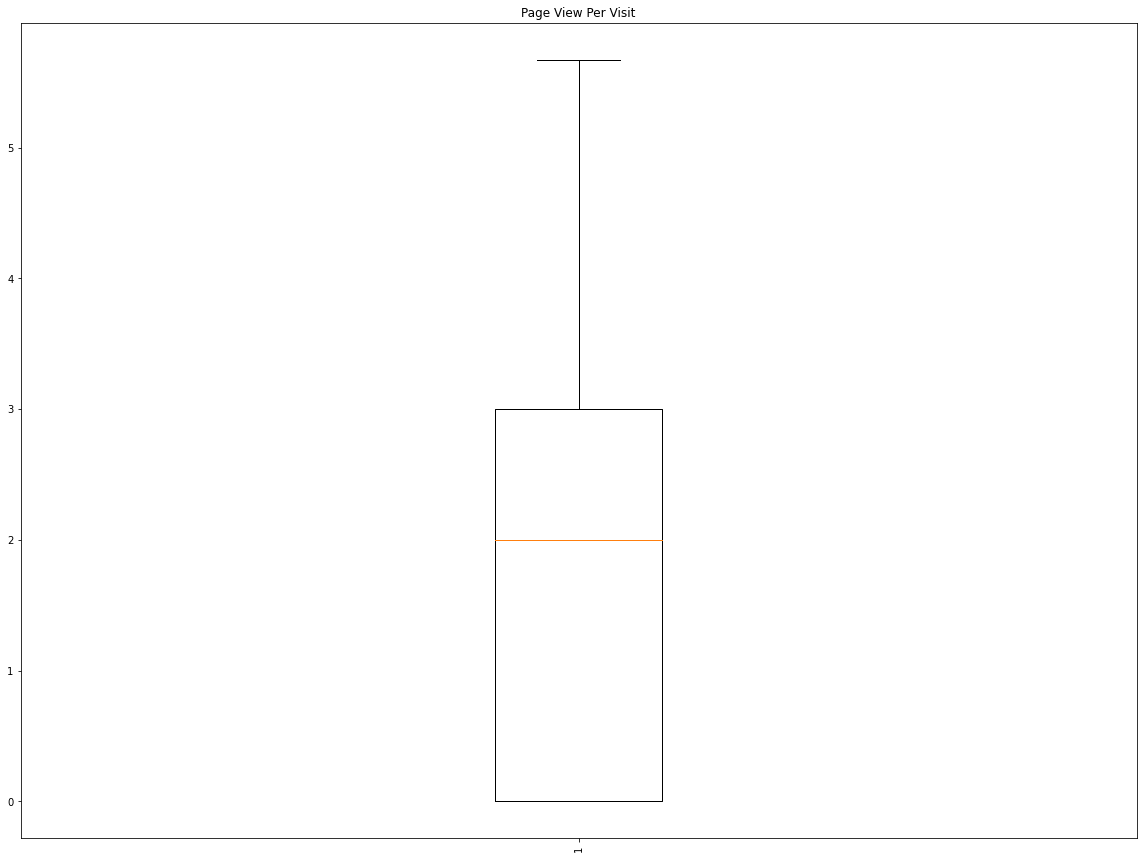

In [1261]:
plt.figure(figsize=(20,15))
plt.boxplot(data = data3, x = 'Page Views Per Visit')
plt.title('Page View Per Visit')
plt.xticks(rotation = 90)
plt.show()

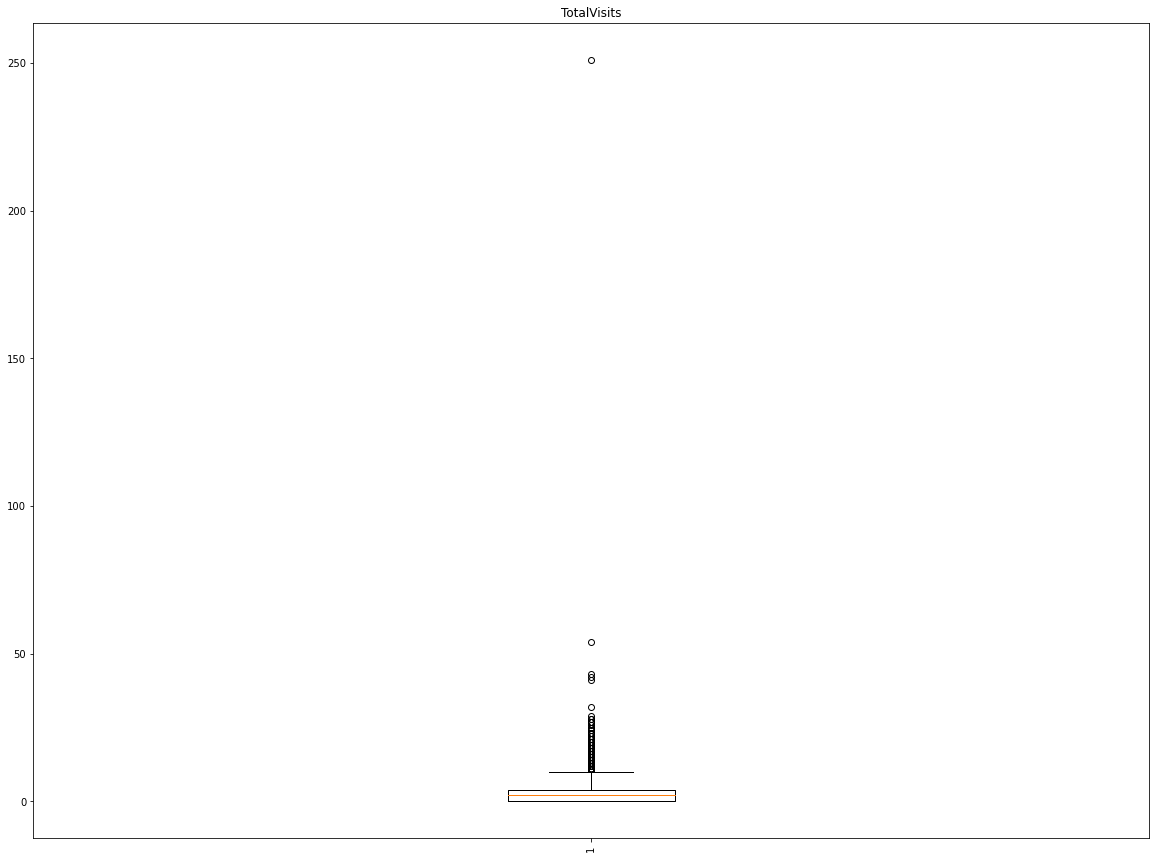

In [1262]:
plt.figure(figsize=(20,15))
plt.boxplot(data = data3, x = 'TotalVisits')
plt.title('TotalVisits')
plt.xticks(rotation = 90)
plt.show()

In [1263]:
data4 = data3[data3['TotalVisits']<11]
data4

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0.00,Page Visited on Website,Finance Management,Other,Unemployed,Low in Relevance,Undecided,Mumbai,1,Modified
1,API,Organic Search,0,0,5,674,2.50,Email Opened,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,1,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Email Opened,Business Administration,Other,Student,Might be,Potential Lead,Mumbai,0,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Not Sure,Undecided,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1.00,Converted to Lead,Finance Management,Other,Unemployed,Might be,Undecided,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8,1845,2.67,Email Marked Spam,IT Projects Management,Other,Unemployed,High in Relevance,Potential Lead,Mumbai,0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2,238,2.00,SMS Sent,Media and Advertising,Other,Unemployed,Might be,Potential Lead,Mumbai,0,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2,199,2.00,SMS Sent,Business Administration,Other,Unemployed,Not Sure,Potential Lead,Mumbai,0,SMS Sent
9238,Landing Page Submission,Google,0,1,3,499,3.00,SMS Sent,Human Resource Management,Online Search,Unemployed,Might be,Undecided,Other Metro Cities,1,SMS Sent


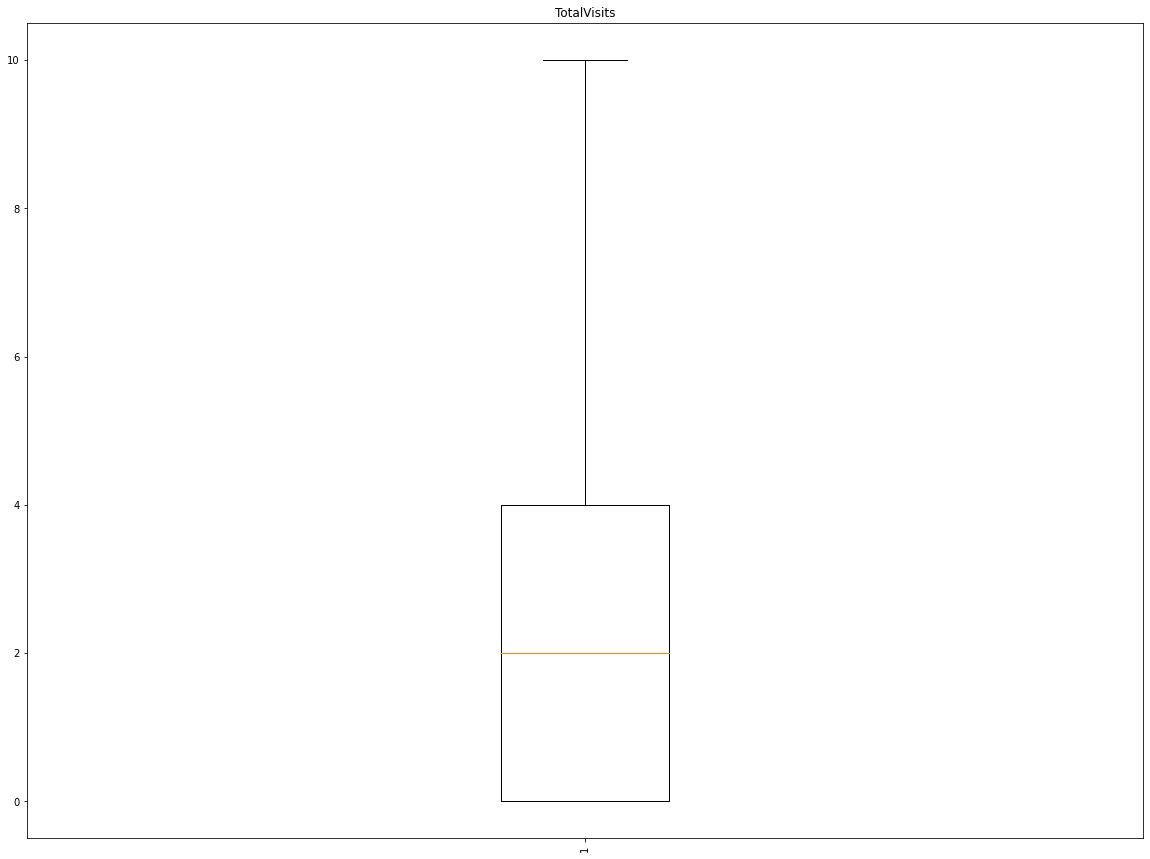

In [1264]:
plt.figure(figsize=(20,15))
plt.boxplot(data = data4, x = 'TotalVisits')
plt.title('TotalVisits')
plt.xticks(rotation = 90)
plt.show()

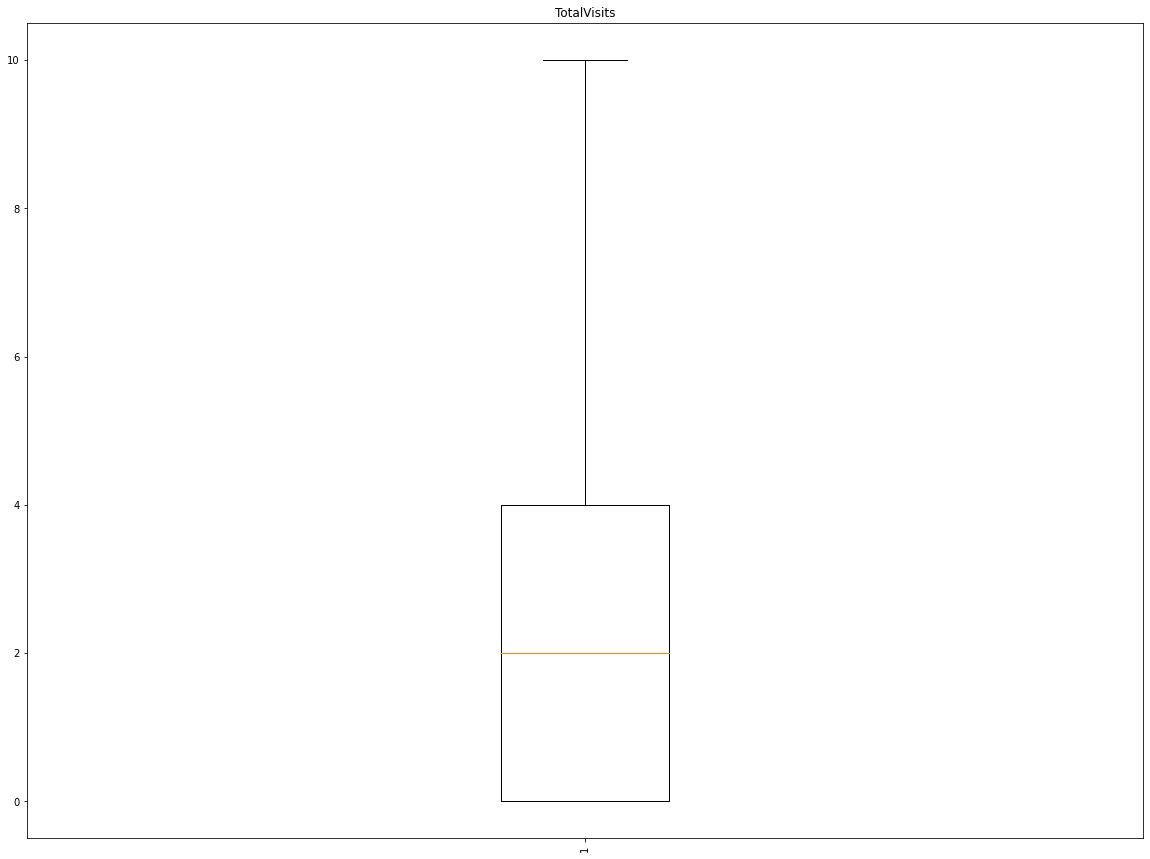

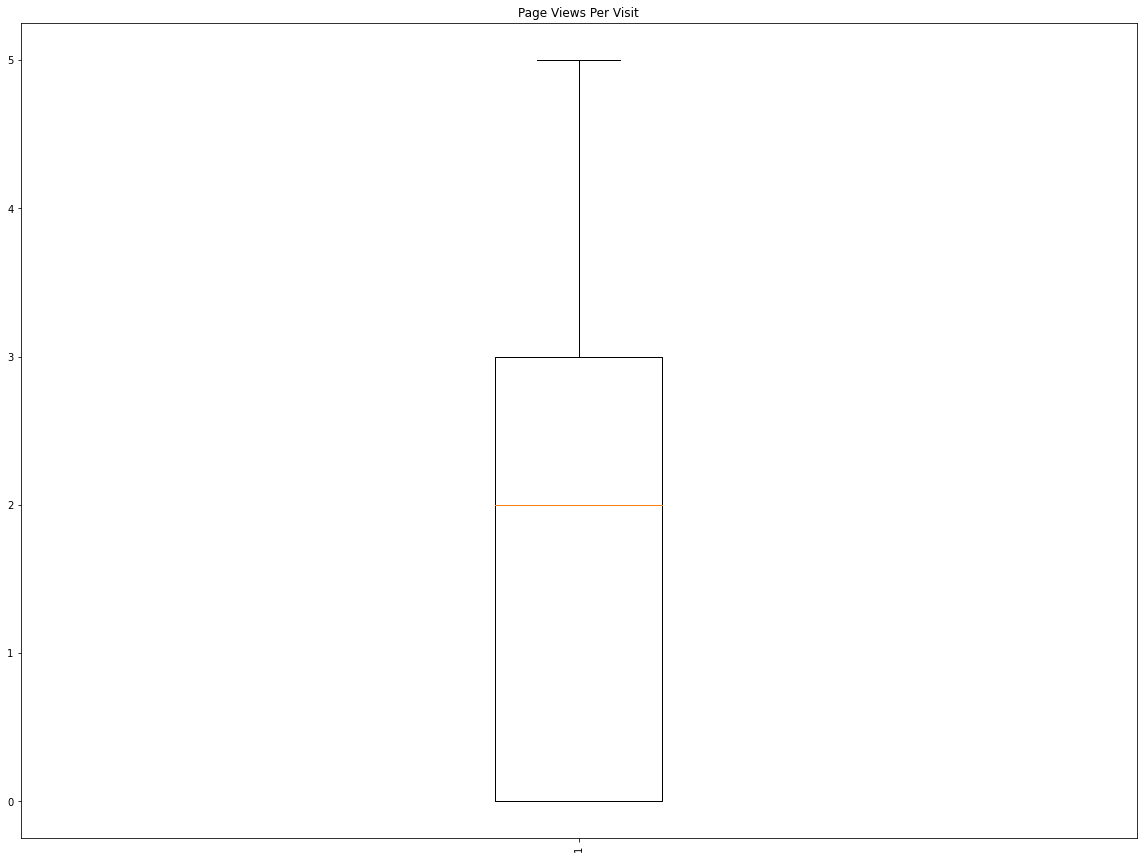

In [1265]:
for i in list1:
    plt.figure(figsize=(20,15))
    plt.boxplot(data = data4, x = i)
    plt.title(i)
    plt.xticks(rotation = 90)
    plt.show()

<AxesSubplot:>

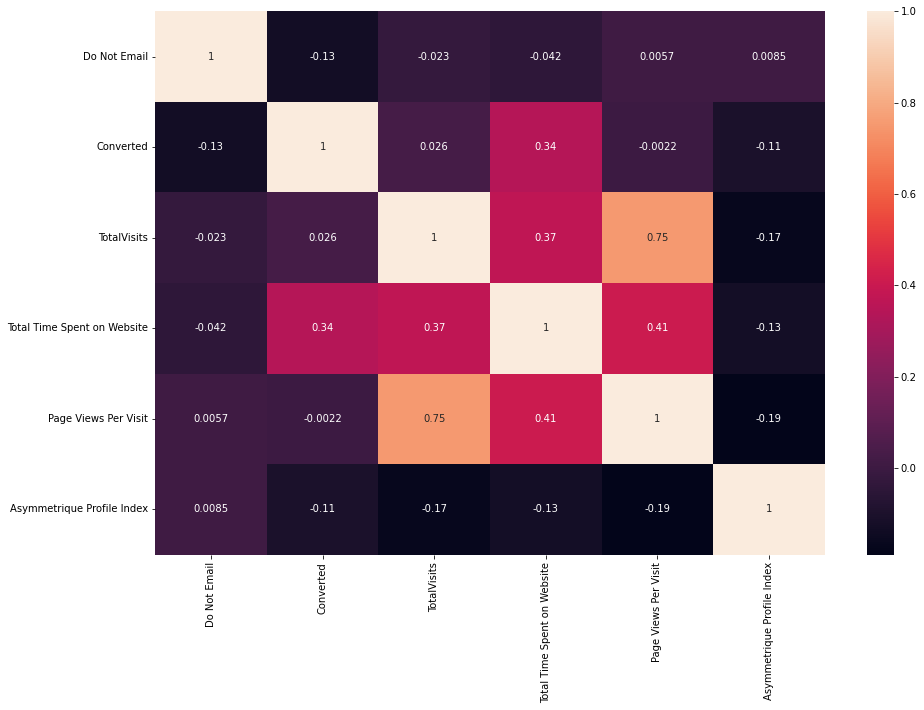

In [1266]:
plt.figure(figsize = (15,10))
sns.heatmap(data4.corr(), annot = True)

# Dropping Asymmetrique profile index and it has high negative correlation with Asymmetrique profile score

In [1267]:
data4.drop('Asymmetrique Profile Index', axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

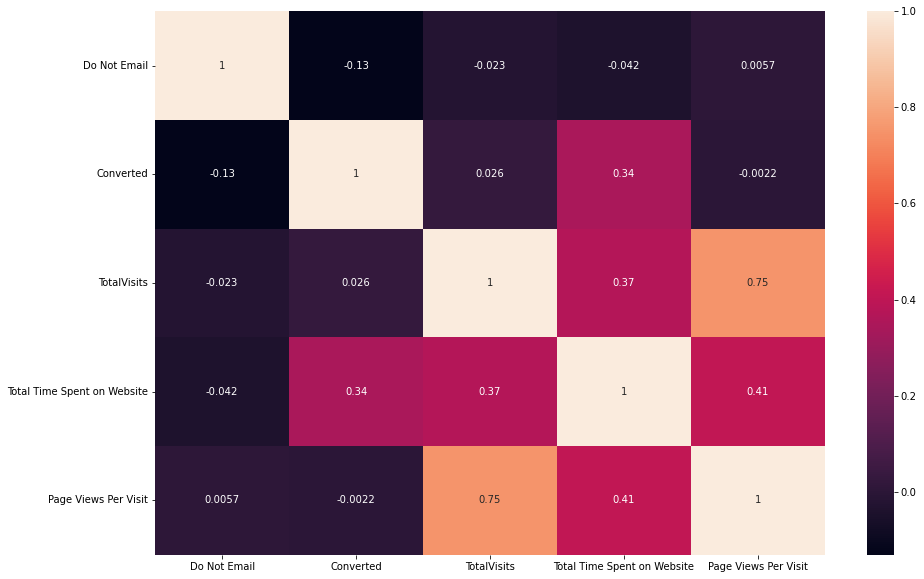

In [1268]:
plt.figure(figsize = (15,10))
sns.heatmap(data4.corr(), annot = True)

In [1269]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         8381 non-null   object 
 1   Lead Source                         8381 non-null   object 
 2   Do Not Email                        8381 non-null   int32  
 3   Converted                           8381 non-null   int32  
 4   TotalVisits                         8381 non-null   int32  
 5   Total Time Spent on Website         8381 non-null   int32  
 6   Page Views Per Visit                8381 non-null   float64
 7   Last Activity                       8381 non-null   object 
 8   Specialization                      8381 non-null   object 
 9   How did you hear about X Education  8381 non-null   object 
 10  What is your current occupation     8381 non-null   object 
 11  Lead Quality                        8381 no

In [1270]:
dummy_data = pd.get_dummies(data4[['Lead Origin','What is your current occupation', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education',
                             'City','Lead Quality','Lead Profile','Last Notable Activity']], drop_first=True)

In [1271]:
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1272]:
lead_data = pd.concat([data4, dummy_data], axis=1)


In [1274]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Finance Management,Other,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5,674,2.5,Email Opened,Finance Management,Other,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Other,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Finance Management,Other,...,0,0,1,0,0,0,0,0,0,0


In [1275]:
for i in lead_data.columns:
    if lead_data[i].dtype == object:
        print (i)

Lead Origin
Lead Source
Last Activity
Specialization
How did you hear about X Education
What is your current occupation
Lead Quality
Lead Profile
City
Last Notable Activity


In [1276]:
lead_data=lead_data.drop(columns=['Lead Origin',
'Lead Source',
'Last Activity',
'Specialization',
'How did you hear about X Education',
'What is your current occupation',
'Lead Quality',
'Lead Profile',
'City',
'Last Notable Activity'])

In [1277]:
lead_data

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,1532,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,2,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,2,199,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,1,3,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Spliting into x and y variables

In [1279]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1280]:
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

# Apliting and scaling data

In [1281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2930,0,1.488900,-0.359953,0.030485,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
378,0,-0.262607,-0.170549,0.030485,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,0,-1.138360,-0.861963,-1.293724,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3752,0,1.051023,-0.422474,2.016800,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6388,0,-1.138360,-0.861963,-1.293724,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature selection using RFE

In [1283]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [1284]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 51),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 9),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 24),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 6),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 56),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Live Chat', False, 26),
 ('Lead Source_NC_EDM', False, 80),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 63),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sit

In [1285]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Student of SomeSchool', 'Lead Profile_Undecided',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

# Building model

In [1286]:
import statsmodels.api as sm

In [1287]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5845
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.5
Date:                Thu, 02 Mar 2023   Deviance:                       4060.9
Time:                        22:59:07   Pearson chi2:                 6.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4376      0.212     11.500      0.000       2.022       2.853
Do Not Email                                            -1.4131      0.197     -7.183      0.000      -1.799      -1.028
Total Time Spent on Website                              1.0738      0.046     23.401      0.000       0.984       1.164
Lead Origin_Lead Add Form                                2.7539      0.216     12.740      0.000       2.330       3.178
What is your current occupation_Housewife               21.6673    1.5e+04      0.001      0.999   -2.93e+04    2.93e+04
What is your current occupation_Working Professional     1.9521      0.210      9.312      0.000       1.541       2.363
Lead Source_Olark Chat                                   1.2882      0.117     11.043      0.000       1.060       1.517
Lead Source_Welingak Website                             3.1299      0.755      4.147      0.000       1.651       4.609
Last Activity_Olark Chat Conversation                   -0.8709      0.219     -3.970      0.000      -1.301      -0.441
Last Activity_SMS Sent                                   0.7985      0.154      5.196      0.000       0.497       1.100
Lead Quality_Might be                                   -1.9068      0.161    -11.822      0.000      -2.223      -1.591
Lead Quality_Not Sure                                   -2.8067      0.188    -14.891      0.000      -3.176      -2.437
Lead Quality_Worst                                      -4.9487      0.467    -10.587      0.000      -5.865      -4.033
Lead Profile_Student of SomeSchool                      -0.9959      0.630     -1.581      0.114      -2.230       0.239
Lead Profile_Undecided                                  -1.1429      0.121     -9.477      0.000      -1.379      -0.907
Last Notable Activity_Email Link Clicked                -1.3425      0.317     -4.231      0.000      -1.964      -0.721
Last Notable Activity_Email Opened                      -1.1474      0.180     -6.366      0.000      -1.501      -0.794
Last Notable Activity_Had a Phone Conversation           1.7404      1.233      1.411      0.158      -0.676       4.157
Last Notable Activity_Modified                          -1.6956      0.147    -11.555      0.000      -1.983      -1.408
Last Notable Activity_Olark Chat Conversation           -1.5249      0.432     -3.530      0.000      -2.371      -0.678
Last Notable Activity_Page Visited on Website           -1.1151      0.298     -3.748      0.000      -1.698      -0.532
========================================================================================================================
"""

# droping column 'What is your current occupation_Housewife' as it has high p value

In [1288]:
col1 = cols.drop('What is your current occupation_Housewife')

#  Model 2

In [1289]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5846
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.9
Date:                Thu, 02 Mar 2023   Deviance:                       4065.8
Time:                        23:00:58   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4570      0.212     11.590      0.000       2.042       2.873
Do Not Email                                            -1.4154      0.197     -7.194      0.000      -1.801      -1.030
Total Time Spent on Website                              1.0725      0.046     23.393      0.000       0.983       1.162
Lead Origin_Lead Add Form                                2.7520      0.216     12.737      0.000       2.329       3.175
What is your current occupation_Working Professional     1.9472      0.210      9.287      0.000       1.536       2.358
Lead Source_Olark Chat                                   1.2839      0.117     11.012      0.000       1.055       1.512
Lead Source_Welingak Website                             3.1283      0.755      4.144      0.000       1.649       4.608
Last Activity_Olark Chat Conversation                   -0.8742      0.219     -3.986      0.000      -1.304      -0.444
Last Activity_SMS Sent                                   0.7946      0.154      5.173      0.000       0.494       1.096
Lead Quality_Might be                                   -1.9197      0.161    -11.923      0.000      -2.235      -1.604
Lead Quality_Not Sure                                   -2.8210      0.188    -14.980      0.000      -3.190      -2.452
Lead Quality_Worst                                      -4.9624      0.467    -10.623      0.000      -5.878      -4.047
Lead Profile_Student of SomeSchool                      -1.0012      0.630     -1.589      0.112      -2.236       0.234
Lead Profile_Undecided                                  -1.1446      0.120     -9.512      0.000      -1.380      -0.909
Last Notable Activity_Email Link Clicked                -1.3433      0.317     -4.239      0.000      -1.964      -0.722
Last Notable Activity_Email Opened                      -1.1485      0.180     -6.376      0.000      -1.502      -0.795
Last Notable Activity_Had a Phone Conversation           1.7349      1.233      1.407      0.159      -0.682       4.152
Last Notable Activity_Modified                          -1.6953      0.147    -11.553      0.000      -1.983      -1.408
Last Notable Activity_Olark Chat Conversation           -1.5235      0.432     -3.528      0.000      -2.370      -0.677
Last Notable Activity_Page Visited on Website           -1.1195      0.298     -3.763      0.000      -1.703      -0.536
========================================================================================================================
"""

# Droping column 'Last Notable Activity_Had a Phone Conversation' as it has high p value

In [1290]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

# Mode 3

In [1291]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5847
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.0
Date:                Thu, 02 Mar 2023   Deviance:                       4068.0
Time:                        23:03:02   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4908      0.211     11.807      0.000       2.077       2.904
Do Not Email                                            -1.4265      0.197     -7.252      0.000      -1.812      -1.041
Total Time Spent on Website                              1.0711      0.046     23.379      0.000       0.981       1.161
Lead Origin_Lead Add Form                                2.7495      0.216     12.720      0.000       2.326       3.173
What is your current occupation_Working Professional     1.9434      0.210      9.270      0.000       1.533       2.354
Lead Source_Olark Chat                                   1.2788      0.116     10.977      0.000       1.050       1.507
Lead Source_Welingak Website                             3.1307      0.755      4.147      0.000       1.651       4.610
Last Activity_Olark Chat Conversation                   -0.8826      0.219     -4.027      0.000      -1.312      -0.453
Last Activity_SMS Sent                                   0.7653      0.152      5.021      0.000       0.467       1.064
Lead Quality_Might be                                   -1.9156      0.161    -11.908      0.000      -2.231      -1.600
Lead Quality_Not Sure                                   -2.8213      0.188    -14.986      0.000      -3.190      -2.452
Lead Quality_Worst                                      -4.9605      0.467    -10.622      0.000      -5.876      -4.045
Lead Profile_Student of SomeSchool                      -1.0018      0.630     -1.591      0.112      -2.236       0.233
Lead Profile_Undecided                                  -1.1450      0.120     -9.523      0.000      -1.381      -0.909
Last Notable Activity_Email Link Clicked                -1.3775      0.316     -4.358      0.000      -1.997      -0.758
Last Notable Activity_Email Opened                      -1.1834      0.179     -6.620      0.000      -1.534      -0.833
Last Notable Activity_Modified                          -1.7204      0.146    -11.782      0.000      -2.007      -1.434
Last Notable Activity_Olark Chat Conversation           -1.5481      0.432     -3.587      0.000      -2.394      -0.702
Last Notable Activity_Page Visited on Website           -1.1540      0.297     -3.890      0.000      -1.735      -0.573
========================================================================================================================
"""

# Droping column 'Lead Profile_Student of SomeSchool' as it has high p value

In [1293]:
col1 = col1.drop('Lead Profile_Student of SomeSchool')

# Model 4

In [1294]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5848
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.3
Date:                Thu, 02 Mar 2023   Deviance:                       4070.7
Time:                        23:05:36   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4739      0.211     11.751      0.000       2.061       2.887
Do Not Email                                            -1.4249      0.197     -7.245      0.000      -1.810      -1.039
Total Time Spent on Website                              1.0696      0.046     23.382      0.000       0.980       1.159
Lead Origin_Lead Add Form                                2.7525      0.216     12.735      0.000       2.329       3.176
What is your current occupation_Working Professional     1.9485      0.210      9.265      0.000       1.536       2.361
Lead Source_Olark Chat                                   1.2748      0.116     10.950      0.000       1.047       1.503
Lead Source_Welingak Website                             3.1245      0.755      4.139      0.000       1.645       4.604
Last Activity_Olark Chat Conversation                   -0.8796      0.219     -4.016      0.000      -1.309      -0.450
Last Activity_SMS Sent                                   0.7691      0.152      5.048      0.000       0.470       1.068
Lead Quality_Might be                                   -1.9184      0.161    -11.934      0.000      -2.233      -1.603
Lead Quality_Not Sure                                   -2.8224      0.188    -15.007      0.000      -3.191      -2.454
Lead Quality_Worst                                      -5.3662      0.426    -12.591      0.000      -6.202      -4.531
Lead Profile_Undecided                                  -1.1264      0.120     -9.399      0.000      -1.361      -0.892
Last Notable Activity_Email Link Clicked                -1.3733      0.316     -4.348      0.000      -1.992      -0.754
Last Notable Activity_Email Opened                      -1.1834      0.179     -6.622      0.000      -1.534      -0.833
Last Notable Activity_Modified                          -1.7166      0.146    -11.763      0.000      -2.003      -1.431
Last Notable Activity_Olark Chat Conversation           -1.5508      0.431     -3.597      0.000      -2.396      -0.706
Last Notable Activity_Page Visited on Website           -1.1561      0.296     -3.903      0.000      -1.737      -0.576
========================================================================================================================
"""

# Checking VIF Values

In [1295]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Quality_Might be,8.75
11,Lead Profile_Undecided,6.64
14,Last Notable Activity_Modified,2.94
13,Last Notable Activity_Email Opened,2.69
7,Last Activity_SMS Sent,2.66
9,Lead Quality_Not Sure,2.06
6,Last Activity_Olark Chat Conversation,2.00
4,Lead Source_Olark Chat,1.83
2,Lead Origin_Lead Add Form,1.58
10,Lead Quality_Worst,1.50


In [1296]:
col1 = col1.drop('Lead Quality_Might be')

# Model 5

In [1297]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5849
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2113.9
Date:                Thu, 02 Mar 2023   Deviance:                       4227.7
Time:                        23:07:32   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5372      0.186      8.278      0.000       1.173       1.901
Do Not Email                                            -1.5086      0.194     -7.761      0.000      -1.890      -1.128
Total Time Spent on Website                              1.0856      0.045     24.157      0.000       0.998       1.174
Lead Origin_Lead Add Form                                3.0562      0.210     14.544      0.000       2.644       3.468
What is your current occupation_Working Professional     2.0244      0.207      9.759      0.000       1.618       2.431
Lead Source_Olark Chat                                   1.2560      0.114     11.015      0.000       1.032       1.479
Lead Source_Welingak Website                             2.7593      0.755      3.657      0.000       1.280       4.238
Last Activity_Olark Chat Conversation                   -1.0602      0.217     -4.886      0.000      -1.486      -0.635
Last Activity_SMS Sent                                   0.6096      0.151      4.047      0.000       0.314       0.905
Lead Quality_Not Sure                                   -1.2261      0.127     -9.677      0.000      -1.474      -0.978
Lead Quality_Worst                                      -4.2280      0.410    -10.317      0.000      -5.031      -3.425
Lead Profile_Undecided                                  -1.9039      0.100    -18.992      0.000      -2.100      -1.707
Last Notable Activity_Email Link Clicked                -1.4653      0.308     -4.751      0.000      -2.070      -0.861
Last Notable Activity_Email Opened                      -1.2407      0.176     -7.043      0.000      -1.586      -0.895
Last Notable Activity_Modified                          -1.7658      0.147    -12.029      0.000      -2.054      -1.478
Last Notable Activity_Olark Chat Conversation           -1.5526      0.432     -3.598      0.000      -2.398      -0.707
Last Notable Activity_Page Visited on Website           -1.3174      0.289     -4.562      0.000      -1.883      -0.751
========================================================================================================================
"""

# Checking vif

In [1298]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Profile_Undecided,4.08
13,Last Notable Activity_Modified,2.46
12,Last Notable Activity_Email Opened,2.12
7,Last Activity_SMS Sent,2.08
6,Last Activity_Olark Chat Conversation,1.97
4,Lead Source_Olark Chat,1.83
2,Lead Origin_Lead Add Form,1.56
14,Last Notable Activity_Olark Chat Conversation,1.34
5,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.26


In [1299]:
col1 = col1.drop('Lead Profile_Undecided')

In [1300]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5850
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2311.7
Date:                Thu, 02 Mar 2023   Deviance:                       4623.4
Time:                        23:09:20   Pearson chi2:                 6.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0162      0.158     -0.102      0.918      -0.326       0.294
Do Not Email                                            -1.6015      0.187     -8.584      0.000      -1.967      -1.236
Total Time Spent on Website                              1.1000      0.043     25.547      0.000       1.016       1.184
Lead Origin_Lead Add Form                                3.6197      0.202     17.962      0.000       3.225       4.015
What is your current occupation_Working Professional     2.5799      0.196     13.181      0.000       2.196       2.964
Lead Source_Olark Chat                                   1.1170      0.108     10.358      0.000       0.906       1.328
Lead Source_Welingak Website                             1.9262      0.752      2.563      0.010       0.453       3.399
Last Activity_Olark Chat Conversation                   -1.1151      0.205     -5.431      0.000      -1.518      -0.713
Last Activity_SMS Sent                                   0.4787      0.143      3.348      0.001       0.198       0.759
Lead Quality_Not Sure                                   -1.0111      0.123     -8.199      0.000      -1.253      -0.769
Lead Quality_Worst                                      -3.2562      0.415     -7.847      0.000      -4.070      -2.443
Last Notable Activity_Email Link Clicked                -1.4387      0.293     -4.910      0.000      -2.013      -0.864
Last Notable Activity_Email Opened                      -1.1073      0.167     -6.623      0.000      -1.435      -0.780
Last Notable Activity_Modified                          -1.6483      0.140    -11.787      0.000      -1.922      -1.374
Last Notable Activity_Olark Chat Conversation           -1.6697      0.424     -3.937      0.000      -2.501      -0.839
Last Notable Activity_Page Visited on Website           -1.2842      0.274     -4.689      0.000      -1.821      -0.747
========================================================================================================================
"""

In [1301]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.95
4,Lead Source_Olark Chat,1.82
12,Last Notable Activity_Modified,1.64
2,Lead Origin_Lead Add Form,1.52
7,Last Activity_SMS Sent,1.34
13,Last Notable Activity_Olark Chat Conversation,1.29
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25
3,What is your current occupation_Working Profes...,1.20
11,Last Notable Activity_Email Opened,1.20


In [1302]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2930    0.062531
378     0.212307
2655    0.996711
3752    0.169637
6388    0.277951
9197    0.163051
7687    0.004297
5403    0.810952
1721    0.706750
5935    0.004494
dtype: float64

In [1303]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.062531  , 0.21230691, 0.99671107, 0.16963679, 0.27795138,
       0.1630506 , 0.00429684, 0.81095228, 0.70674993, 0.00449438])

In [1304]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.062531,2930
1,0,0.212307,378
2,1,0.996711,2655
3,0,0.169637,3752
4,0,0.277951,6388


In [1305]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.062531,2930,0
1,0,0.212307,378,0
2,1,0.996711,2655,1
3,0,0.169637,3752,0
4,0,0.277951,6388,0


# Building confusion matrix

In [1306]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3227  415]
 [ 632 1592]]


In [1307]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8215138083873167


In [1308]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1309]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7158273381294964


In [1310]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.886051619989017


In [1311]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7932237169905332


In [1312]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8362270018139414


# Plotting ROC Curve

In [1313]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1314]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

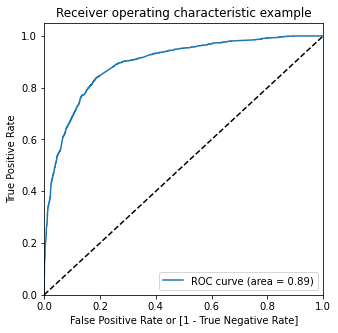

In [1315]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [1316]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.062531,2930,0,1,0,0,0,0,0,0,0,0,0
1,0,0.212307,378,0,1,1,1,0,0,0,0,0,0,0
2,1,0.996711,2655,1,1,1,1,1,1,1,1,1,1,1
3,0,0.169637,3752,0,1,1,0,0,0,0,0,0,0,0
4,0,0.277951,6388,0,1,1,1,0,0,0,0,0,0,0


In [1317]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379134  1.000000  0.000000
0.1   0.1  0.621036  0.968975  0.408567
0.2   0.2  0.763723  0.909173  0.674904
0.3   0.3  0.822025  0.839928  0.811093
0.4   0.4  0.825776  0.795863  0.844042
0.5   0.5  0.821514  0.715827  0.886052
0.6   0.6  0.815547  0.647032  0.918451
0.7   0.7  0.794068  0.531025  0.954695
0.8   0.8  0.771735  0.442446  0.972817
0.9   0.9  0.728606  0.302158  0.989017


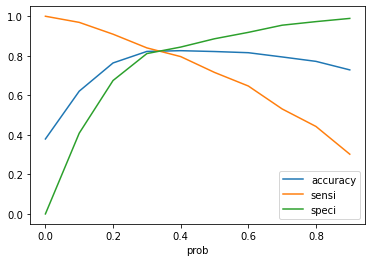

In [1318]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1319]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.062531,2930,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.212307,378,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.996711,2655,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.169637,3752,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.277951,6388,0,1,1,1,0,0,0,0,0,0,0,0


In [1320]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.062531,2930,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.212307,378,0,1,1,1,0,0,0,0,0,0,0,0,21
2,1,0.996711,2655,1,1,1,1,1,1,1,1,1,1,1,1,100
3,0,0.169637,3752,0,1,1,0,0,0,0,0,0,0,0,0,17
4,0,0.277951,6388,0,1,1,1,0,0,0,0,0,0,0,0,28


In [1321]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8237299693146949


In [1322]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3001,  641],
       [ 393, 1831]], dtype=int64)

In [1323]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1324]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8232913669064749


In [1325]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8239978034047227


In [1326]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.17600219659527733


In [1327]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7406957928802589


In [1328]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8842074248674131


In [1329]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7932237169905332


In [1330]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7158273381294964


In [1331]:
from sklearn.metrics import precision_score, recall_score

In [1332]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7932237169905332


In [1333]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7158273381294964


In [1334]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 5861    0
 5862    1
 5863    1
 5864    0
 5865    0
 Name: Converted, Length: 5866, dtype: int32,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5861    1
 5862    1
 5863    1
 5864    0
 5865    0
 Name: predicted, Length: 5866, dtype: int64)

In [1335]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

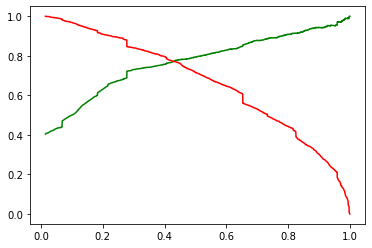

In [1336]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1337]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [1338]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8158,0,-0.861963,0,0,1,0,0,0,0,0,0,0,1,0,0
1727,0,-0.861963,0,0,1,0,1,0,0,0,0,0,1,0,0
8614,1,-0.367308,0,0,0,0,1,0,0,0,0,0,1,0,0
7713,0,-0.387536,0,0,0,0,0,1,0,0,0,0,0,0,0
8856,0,-0.861963,0,0,1,0,0,0,0,0,0,1,0,0,0


In [1339]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


8158    0.183065
1727    0.068446
8614    0.008284
7713    0.509044
8856    0.277951
3694    0.173663
7602    0.216515
9203    0.669000
224     0.277951
2174    0.805348
dtype: float64

In [1340]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1341]:
# Let's see the head
y_pred_1.head()

,0
8158,0.183065
1727,0.068446
8614,0.008284
7713,0.509044
8856,0.277951


In [1342]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1343]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1344]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1345]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1346]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,8158,0.183065
1,0,1727,0.068446
2,0,8614,0.008284
3,0,7713,0.509044
4,0,8856,0.277951


In [1347]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1348]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])


In [1349]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8158,1,0.183065
1,1727,0,0.068446
2,8614,0,0.008284
3,7713,0,0.509044
4,8856,0,0.277951


In [1350]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [1351]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,8158,1,0.183065,0
1,1727,0,0.068446,0
2,8614,0,0.008284,0
3,7713,0,0.509044,1
4,8856,0,0.277951,0


In [1352]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8178926441351889


In [1353]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1263,  263],
       [ 195,  794]], dtype=int64)

In [1354]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1355]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8028311425682507


In [1356]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.827653997378768


In [1357]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,8158,1,0.183065,0,18
1,1727,0,0.068446,0,7
2,8614,0,0.008284,0,1
3,7713,0,0.509044,1,51
4,8856,0,0.277951,0,28


In [1358]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
21,5644,1,0.894418,1,89
28,7688,1,0.896238,1,90
38,3032,1,0.993584,1,99
39,7719,1,0.984686,1,98
40,7472,1,0.910352,1,91
...,...,...,...,...,...
2490,899,1,0.976211,1,98
2492,5721,0,0.846977,1,85
2495,8928,1,0.993564,1,99
2502,1481,1,0.964711,1,96


In [1359]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([5644, 7688, 3032, 7719, 7472, 7644, 3288, 7750, 5804, 7364, 6953,
       3932,  356, 4208, 3703, 1263, 3851, 4940, 1368, 8325, 5535, 7057,
       1614, 3917,  607, 3162, 8648, 8838, 6411, 6906, 5800, 5673, 5175,
       7883,  551, 6422, 5425, 4797, 7187,  948, 8977, 5714, 3312, 2786,
       7863, 1552, 2837, 6544, 7128, 8403, 8056, 4773,  494, 9026,   88,
       4212, 5877, 4313, 2446, 6046, 4537, 2841, 5719, 4955, 7947, 5942,
       7098, 4693, 5641, 8461, 6736, 2664, 8942, 4455,  639, 7268, 6996,
        829, 7167, 2114, 8819, 7469, 4432, 1730,  470, 4717, 7021, 8065,
       1290, 4764, 2653, 2166, 4062, 6269, 8687, 8490, 6742, 7962, 6243,
       6380, 1310, 4378, 6477,  745, 9154, 1625, 1595, 2797, 3425, 5395,
       5137, 4505, 5042, 6119,   76,  943, 8210, 5947, 8786, 3840, 7915,
       4858, 1068, 5801, 1425, 5931, 4453, 7259, 7445, 8397, 3233,   81,
       6313, 2461, 4934, 9031, 5524, 5561, 3310, 2696, 3643, 1663, 3631,
       6499, 4830, 8576, 8089, 6723, 1424, 5872, 20

In [1360]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.619692
What is your current occupation_Working Professional    2.579915
Lead Source_Welingak Website                            1.926239
Lead Source_Olark Chat                                  1.117014
Total Time Spent on Website                             1.100043
Last Activity_SMS Sent                                  0.478677
const                                                  -0.016190
Lead Quality_Not Sure                                  -1.011120
Last Notable Activity_Email Opened                     -1.107274
Last Activity_Olark Chat Conversation                  -1.115086
Last Notable Activity_Page Visited on Website          -1.284249
Last Notable Activity_Email Link Clicked               -1.438719
Do Not Email                                           -1.601454
Last Notable Activity_Modified                         -1.648345
Last Notable Activity_Olark Chat Conversation          -1.669746
Lead Quality_Worst       

Recommendations:
The company should make calls to the leads coming from the lead Source "Welingak Websites" and "Chat" as these are more likely to get converted.
The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
The company should make calls to the leads coming from the lead Origin "Add  form" are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.